# Incorporando Análisis de Hofstede en GED

Este notebook trabaja con los datos originados por la iniciativa iGEDS, en particular datos a nivel internacional de 106 países que describen 5 pilares principales:

*   Foundational Institutions
*   Innovation capability
*   Entrepreneurship capability
*   Comparative Advantage
*   Social Impact
*   Economic Impact

Sumado a esto, se incorpora la información de 80 países correspondiente en el análisis antropológico de Hofstede, en el cual se comparan los valores culturales de distintos países con base en un análisis estadístico de las respuestas a un instrumento, o encuesta, que se enfoca en 6 dimensiones:

*   Individualism vs. Collectivism
*   Uncertainty avoidance
*   Power distance ~ strength of social hierarchy
*   Masculinity vs. Feminity
*   Long term orientation
*   Indulgence vs. Self restraint

En este código se realiza lo siguiente

-   Re-escalan todas las métricas a valores entre 1-5 
-   Imputan valores faltantes para algunos paises 
-   Visualiza la distribución de las métricas por país.

## Parte 1: Importe de paquetes de Python, y de Datos 

In [1]:
! pip install pingouin
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
import scipy.stats as stats
import networkx as nx

Importe de datos originales:

In [62]:
#data = pd.read_csv('Referenced_CSVs/iEcosystems + Hofstede (106 countries dataset) - Indicators.csv')
data = pd.read_csv('Referenced_CSVs/iEcosystems + Hofstede (106 countries dataset) (regiónnueva) - Indicators.csv')
data.rename(columns={"Long Term Orientation versus Short Term Normative Orientation (LTO)":"Long Term Orientation (LTO)"}, inplace=True)
#data

## Parte 2: Obtención del Tidy DataFrame

En esta parte obtendremos el **tidy** dataframe, el cual contiene: una característica por columna y una observación por fila. Comenzamos removiendo los valores más altos y bajos, y asignamos el nombre del país como índice: 

In [63]:
minimums = data.iloc[106,4:].astype(float).values
maximums = data.iloc[107,4:].astype(float).values
df = data.drop(axis=0, index=[106,107])
df.set_index('Country', inplace=True)
df

Region         Region 2  \
Country                                                            
Albania                 Europe and Central Asia           Europa   
Algeria            Middle East and North Africa    Oriente Medio   
Argentina       Latin America and the Caribbean     Iberoamérica   
Armenia                 Europe and Central Asia              NaN   
Australia                 East Asia and Pacific              NaN   
...                                         ...              ...   
United Kingdom          Europe and Central Asia           Europa   
United States                     North America              NaN   
Uruguay         Latin America and the Caribbean     Iberoamérica   
Vietnam                   East Asia and Pacific  Extremo Oriente   
Zambia                       Sub-Saharan Africa              NaN   

                        Development Stage  1.01 Ease of doing business (WB)  \
Country                                                                       
Albania           Economies in transition                              67.7   
Algeria              Developing economies                              48.6   
Argentina            Developing economies                              59.0   
Armenia           Economies in transition                              74.5   
Australia             Developed economies                              81.2   
...                                   ...                               ...   
United Kingdom        Developed economies                              83.5   
United States         Developed economies                              84.0   
Uruguay              Developing economies                              61.5   
Vietnam              Developing economies                              69.8   
Zambia          Least developed countries                              66.9   

                1.02 Starting a business (WB)  1.03 Paying taxes (WB)  \
Country                                                                 
Albania                                  91.8                    65.2   
Algeria                                  78.0                    53.9   
Argentina                                80.4                    49.3   
Armenia                                  96.1                    81.5   
Australia                                96.6                    85.7   
...                                       ...                     ...   
United Kingdom                           94.6                    86.2   
United States                            91.6                    86.8   
Uruguay                                  89.6                    70.3   
Vietnam                                  85.1                    69.0   
Zambia                                   84.9                    88.9   

                1.04 Resolving Insolvency (WB)  1.05 Enforcing contracts (WB)  \
Country                                                                         
Albania                                   67.7                           53.5   
Algeria                                   49.2                           54.8   
Argentina                                 40.0                           57.5   
Armenia                                   44.6                           69.7   
Australia                                 78.9                           79.0   
...                                        ...                            ...   
United Kingdom                            80.3                           68.7   
United States                             90.5                           73.4   
Uruguay                                   53.6                           56.3   
Vietnam                                   38.0                           62.1   
Zambia                                    49.3                           50.8   

                1.06 Property Rights (IEF)  1.07 Government Integrity (IEF)  \
Country                                      

Proceso de re-escalamiento:

In [64]:
df_scaled = df.copy()
df_scaled = df_scaled.drop('Region', axis=1)
df_scaled = df_scaled.drop('Region 2', axis=1)
df_scaled = df_scaled.drop('Development Stage', axis=1)

columns = df_scaled.columns.values.tolist()

for column, minval, maxval in zip(columns, minimums, maximums):
    df_scaled[column] = df_scaled[column].apply(lambda x: (x-minval)/(maxval-minval))
    df_scaled[column] = df_scaled[column].apply(lambda x: 1+4*x)


df_scaled

1.01 Ease of doing business (WB)  \
Country                                            
Albania                                    3.708   
Algeria                                    2.944   
Argentina                                  3.360   
Armenia                                    3.980   
Australia                                  4.248   
...                                          ...   
United Kingdom                             4.340   
United States                              4.360   
Uruguay                                    3.460   
Vietnam                                    3.792   
Zambia                                     3.676   

                1.02 Starting a business (WB)  1.03 Paying taxes (WB)  \
Country                                                                 
Albania                                 4.672                   3.608   
Algeria                                 4.120                   3.156   
Argentina                               4.216                   2.972   
Armenia                                 4.844                   4.260   
Australia                               4.864                   4.428   
...                                       ...                     ...   
United Kingdom                          4.784                   4.448   
United States                           4.664                   4.472   
Uruguay                                 4.584                   3.812   
Vietnam                                 4.404                   3.760   
Zambia                                  4.396                   4.556   

                1.04 Resolving Insolvency (WB)  1.05 Enforcing contracts (WB)  \
Country                                                                         
Albania                                  3.708                          3.140   
Algeria                                  2.968                          3.192   
Argentina                                2.600                          3.300   
Armenia                                  2.784                          3.788   
Australia                                4.156                          4.160   
...                                        ...                            ...   
United Kingdom                           4.212                          3.748   
United States                            4.620                          3.936   
Uruguay                                  3.144                          3.252   
Vietnam                                  2.520                          3.484   
Zambia                                   2.972                          3.032   

                1.06 Property Rights (IEF)  1.07 Government Integrity (IEF)  \
Country                                                                       
Albania                              3.284                            2.552   
Algeria                              2.516                            2.132   
Argentina                            3.020                            2.988   
Armenia                              3.428                            2.736   
Australia                            4.312                            4.572   
...                                    ...                              ...   
United Kingdom                       4.688                            4.596   
United States                        4.272                            4.088   
Uruguay                              3.880                            3.940   
Vietnam                              3.104                            2.352   
Zambia                               2.808                            2.136   

                1.08 Labor Freedom (IEF)  1.09 Trade freedom (IEF)  \
Country                                                              
Albania                            3.084                     4.536   
Algeria                            3.020                     3.648   
Argentina                  

In [65]:
#sum(list(data.isnull().sum()))      #919
#sum(list(df.isnull().sum()))        #913
sum(list(df_scaled.isnull().sum())) #886

886

Con esto tenemos los datos re-escalados del 1-5. Aún así, algunas entradas tienen valores faltantes, dichos valores se van a inferir con la técnica de **K-vecinos cercanos**, considerando los 5 vecinos más cercanos. Total de valores faltantes: 886.

In [66]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
var = imputer.fit_transform(df_scaled)
df_imputed = pd.DataFrame(var)
var = np.where(var>5,5,var)      #adjust values to 5 or 1 when these are out of bounds
var = np.where(var<1,1,var)

df_imputed.columns = columns
df_imputed.index = df_scaled.index
#pd.set_option('max_columns', None, 'max_rows', None)
df_imputed.head()
#df_imputed

1.01 Ease of doing business (WB)  1.02 Starting a business (WB)  \
Country                                                                      
Albania                               3.708                          4.672   
Algeria                               2.944                          4.120   
Argentina                             3.360                          4.216   
Armenia                               3.980                          4.844   
Australia                             4.248                          4.864   

           1.03 Paying taxes (WB)  1.04 Resolving Insolvency (WB)  \
Country                                                             
Albania                     3.608                           3.708   
Algeria                     3.156                           2.968   
Argentina                   2.972                           2.600   
Armenia                     4.260                           2.784   
Australia                   4.428                           4.156   

           1.05 Enforcing contracts (WB)  1.06 Property Rights (IEF)  \
Country                                                                
Albania                            3.140                       3.284   
Algeria                            3.192                       2.516   
Argentina                          3.300                       3.020   
Armenia                            3.788                       3.428   
Australia                          4.160                       4.312   

           1.07 Government Integrity (IEF)  1.08 Labor Freedom (IEF)  \
Country                                                                
Albania                              2.552                     3.084   
Algeria                              2.132                     3.020   
Argentina                            2.988                     2.860   
Armenia                              2.736                     3.900   
Australia                            4.572                     4.360   

           1.09 Trade freedom (IEF)  1.10 Corruption Perceptions Index (TI)  \
Country                                                                       
Albania                       4.536                                    2.44   
Algeria                       3.648                                    2.40   
Argentina                     3.768                                    2.60   
Armenia                       4.224                                    2.40   
Australia                     4.528                                    4.08   

           ...  \
Country    ...   
Albania    ...   
Algeria    ...   
Argentina  ...   
Armenia    ...   
Australia  ...   

           6.04 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth)  \
Country                                                                                                               
Albania                                             2.549550                                                          
Algeria                                             3.198198                                                          
Argentina                                           3.522523                                                          
Armenia                                             1.846847                                                          
Australia                                           4.027027                                                          

           6.05 FDI inward flow as % of GDP (UNCTAD)  GNI per capita (WB)  \
Country                                                                     
Albania                                     3.394919             1.236727   
Algeria                                     2.515012             1.174866   
Argentina                                   2.690531             1.527034   
Armenia                                     2.651270             1.209

In [67]:
sum(list(df_imputed.isnull().sum()))

0

## Parte 3: DataFrame organizado por pilares

Tenemos los datos limpios, re-escalados, sin valores faltantes. Podemos ahora podemos reorganizar nuestros datos como sigue: tomaremos registro del pilar al que corresponde cada métrica de iEcosystems.

Consideramos cada una de las dimensiones de Hofstede como pilar en este proceso de reorganización.

In [68]:
hofstede_pillars = ['Power Distance Index (PDI)',
            'Individualism versus Collectivism (IDV)',
            'Masculinity versus Feminity (MAS)', 
            'Uncertainty Avoidance Index (UAI)',
            'Long Term Orientation (LTO)',
            'Indulgence versus Restraint (IVR)']


In [69]:
df_means = df_imputed.T

pillars = pd.read_excel('https://github.com/NunezKant/iGEDS/blob/master/iEcosystems%20(106%20countries%20dataset).xlsx?raw=true', decimal = ',', sheet_name=1)
pillars = pillars['Pillar'].values
pillars = np.append(pillars, hofstede_pillars, axis=0)

df_means['Pillars'] = pillars
df_means


Country                                  Albania  Algeria  Argentina  Armenia  \
1.01 Ease of doing business (WB)           3.708    2.944      3.360    3.980   
1.02 Starting a business (WB)              4.672    4.120      4.216    4.844   
1.03 Paying taxes (WB)                     3.608    3.156      2.972    4.260   
1.04 Resolving Insolvency (WB)             3.708    2.968      2.600    2.784   
1.05 Enforcing contracts (WB)              3.140    3.192      3.300    3.788   
...                                          ...      ...        ...      ...   
Individualism versus Collectivism (IDV)    1.664    2.256      2.840    2.608   
Masculinity versus Feminity (MAS)          2.680    3.056      3.240    3.128   
Uncertainty Avoidance Index (UAI)          4.248    3.936      4.440    3.896   
Long Term Orientation (LTO)                3.440    2.040      1.800    3.440   
Indulgence versus Restraint (IVR)          1.600    2.280      3.480    2.040   

Country                                  Australia  Austria  Azerbaijan  \
1.01 Ease of doing business (WB)             4.248    4.148       4.068   
1.02 Starting a business (WB)                4.864    4.328       4.848   
1.03 Paying taxes (WB)                       4.428    4.340       4.360   
1.04 Resolving Insolvency (WB)               4.156    4.096       3.540   
1.05 Enforcing contracts (WB)                4.160    4.020       3.812   
...                                            ...      ...         ...   
Individualism versus Collectivism (IDV)      4.600    3.200       1.896   
Masculinity versus Feminity (MAS)            3.440    4.160       2.960   
Uncertainty Avoidance Index (UAI)            3.040    3.800       3.680   
Long Term Orientation (LTO)                  1.840    3.400       3.440   
Indulgence versus Restraint (IVR)            3.840    3.520       1.880   

Country                                  Bangladesh  Belgium  \
1.01 Ease of doing business (WB)              2.800    4.000   
1.02 Starting a business (WB)                 4.296    4.692   
1.03 Paying taxes (WB)                        3.244    4.136   
1.04 Resolving Insolvency (WB)                2.124    4.364   
1.05 Enforcing contracts (WB)                 1.888    3.572   
...                                             ...      ...   
Individualism versus Collectivism (IDV)       1.800    4.000   
Masculinity versus Feminity (MAS)             3.200    3.160   
Uncertainty Avoidance Index (UAI)             3.400    4.760   
Long Term Orientation (LTO)                   2.880    4.280   
Indulgence versus Restraint (IVR)             1.800    3.280   

Country                                  Bosnia and Herzegovina  ...  Tunisia  \
1.01 Ease of doing business (WB)                          3.616  ...    3.748   
1.02 Starting a business (WB)                             3.400  ...    4.784   
1.03 Paying taxes (WB)                                    3.416  ...    3.776   
1.04 Resolving Insolvency (WB)                            3.728  ...    3.168   
1.05 Enforcing contracts (WB)                             3.312  ...    3.336   
...                                                         ...  ...      ...   
Individualism versus Collectivism (IDV)                   3.080  ...    2.288   
Masculinity versus Feminity (MAS)                         2.984  ...    2.768   
Uncertainty Avoidance Index (UAI)                         3.760  ...    4.088   
Long Term Orientation (LTO)                               3.800  ...    2.464   
Indulgence versus Restraint (IVR)                         2.760  ...    2.184   

Country                                  Turkey  Ukraine  \
1.01 Ease of doing business (WB)          4.072    3.808   
1.02 Starting a business (WB)             4.552    4.644   
1.03 Paying taxes (WB)                    4.464    4.124   
1.04 Resolving Insolvency (WB)            2.540    2.256   
1.05 Enforcing contracts (WB)             3.856    3.544   
...                     

Tomaremos la media por pilar de cada país. 

In [70]:
df_means = df_means.groupby('Pillars').mean().T
df_means

Pillars         1 Foundational Institutions  2.01 I-Human Capital  \
Country                                                             
Albania                              3.4732              2.207633   
Algeria                              3.0096              2.192006   
Argentina                            3.1684              2.021985   
Armenia                              3.6344              2.187459   
Australia                            4.3708              2.878032   
...                                     ...                   ...   
United Kingdom                       4.3396              3.340008   
United States                        4.2960              3.199162   
Uruguay                              3.7808              2.346297   
Vietnam                              3.3420              2.246327   
Zambia                               3.2760              2.210042   

Pillars         2.02 I-Funding  2.03 I-Infrastructure  2.04 I-Demand  \
Country                                                                
Albania               1.337470               2.598926       2.929778   
Algeria               1.674710               2.383803       2.573333   
Argentina             1.682002               2.740698       2.729778   
Armenia               1.398630               2.837184       2.718222   
Australia             2.064750               3.294983       3.268889   
...                        ...                    ...            ...   
United Kingdom        1.967984               3.715226       3.709333   
United States         3.764866               3.606783       4.223556   
Uruguay               1.464989               2.833698       2.578222   
Vietnam               1.419296               2.414585       3.025333   
Zambia                1.368727               2.163111       2.685778   

Pillars         2.05 I-Culture & Incentives  3.01 E-Human Capital  \
Country                                                             
Albania                              1.5660              3.428110   
Algeria                              2.4276              3.182732   
Argentina                            1.7930              3.076940   
Armenia                              1.3420              3.314949   
Australia                            2.8508              3.752603   
...                                     ...                   ...   
United Kingdom                       3.9660              2.853192   
United States                        3.4960              3.722513   
Uruguay                              1.2428              3.046434   
Vietnam                              1.8466              2.495265   
Zambia                               1.3756              2.655574   

Pillars         3.02 E-Funding  3.03 E-Infrastructure  3.04 E-Demand  ...  \
Country                                                               ...   
Albania               2.045130               3.478800         2.3690  ...   
Algeria               1.738879               3.473333         3.2058  ...   
Argentina             1.725475               3.679067         3.1718  ...   
Armenia               2.167727               3.614267         2.6556  ...   
Australia             2.823880               4.229333         3.4370  ...   
...                        ...                    ...            ...  ...   
United Kingdom        3.973914               4.286000         3.8236  ...   
United States         7.088756               4.288533         4.3330  ...   
Uruguay               2.006035               3.926000         2.7408  ...   
Vietnam               2.147998               3.922667         3.2480  ...   
Zambia                2.008592               2.763867         2.3574  ...   

Pillars         5 Social Impact  6 Economic Impact  GNI per capita  \
Country                                                              
Albania                3.935356           2.738519        1.236727   
Algeria                3.715319           2.324024     

## Parte 4: Correlaciones de los promedios de pilares

Ahora podemos obtener la matriz de correlación, a partir de la cual podemos plantear preguntas acerca de cómo se relacionan los diferentes pilares que estamos estudiando. 

Primero que nada, nuestras principales herramientas:

*   `significant_corr`: para cualesquiera dos columnas obtiene su correlación Pearson
*   `print_significant_corr`: si la correlación es estadísticamente significativa, imprime dicha información y grafica el conjunto de datos evaluado en estos dos pilares

In [71]:
def significant_corr(df1,df2,a,b):
    '''
    This function computed the pearson correlation between two data sets a, b, 
    and determines whether this correlation is significant or not. 
    
    Inputs:
    - df1  : a DataFrame
    - df2  : a DataFrame
    - a    : a data vector
    - b    : a data vector
    
    Output : a tuple (B,N) where B is a boolean that answers the question:
    ~do a and b present significant correlation? i.e. p-value<0.1,
    and N=0 is B=False, or N=p-val(a,b) if B=True
    '''
    if df2.empty:
        df2=df1
    r = stats.pearsonr(df1[a], df2[b])
    if r[1] < 0.05:
    #if r[1] < 0.2:
        return (True, r[0], r[1])
    else:
        return (False, r[0], r[1])
    
    
    

def print_significant_corr(df1,df2,a,b):
    '''
    This function computes the Pearson correlation between two data sets a, b, 
    and prints whether this correlation is significant or not, and the 
    corresponding Pearson correlation and p-value. 
    
    Inputs:
    - df1  : a DataFrame
    - df2  : a DataFrame
    - a    : a data vector
    - b    : a data vector
    
    Output : None, but executes print statements showing the findings about aand b.
    '''
    if df2.empty:
        df2=df1
    r = stats.pearsonr(df1[a], df2[b])
    print(f'Correlation between:  ' + a + '   and   ' + b)
    print('**********************************************')
    print(f'Pearson Correlation: {r[0]}, p-value: {r[1]}')
    
    if r[1] < 0.05:
    #if r[1] < 0.2:
        print('*Statistically significant*')
        print('***********************************************')
        print('')
        sns.lmplot(x=b, y=a, data=df1)
        return True, r[0], r[1]
    
    else:
        print('Not significant')
        print('**********************************************')
        print('')
        sns.lmplot(x=b, y=a, data=df1)
        return False, r[0], r[1]

    
    
def significant_corr_many(df1,df2,a,L,nameL):
    '''
    This function computes the Pearson correlation between two data sets a, b, 
    and prints whether this correlation is significant or not, and the 
    corresponding Pearson correlation and p-value. 
    
    Inputs:
    - df1  : a DataFrame
    - df2  : a DataFrame
    - a    : a data vector
    - L    : a collection of data vectors
    - nameL: string to explain what type of information the vectors in L provide 
    
    Output : None, but executes print statements showing the findings about aand b.
    '''
    sig_corrs = {nameL:[], 'Pearson Correlation':[], 'Pvalue':[]}
    
    if df2.empty:
        df2=df1
    for b in L:
        r = stats.pearsonr(df1[a], df2[b])
        if r[1] < 0.05:
        #if r[1] < 0.2:
            sig_corrs[nameL].append(b)
            sig_corrs['Pearson Correlation'].append(r[0])
            sig_corrs['Pvalue'].append(r[1])
    return pd.DataFrame(sig_corrs)

Nos interesa como se relacionan las métricas con las variables de salida:

*   4 Comparative Advantage
*   5 Impact

Primero obtenemos la matriz de correlaciones y la representamos visualmente por medio de un Heatmap:

In [72]:
corr = df_means.corr()

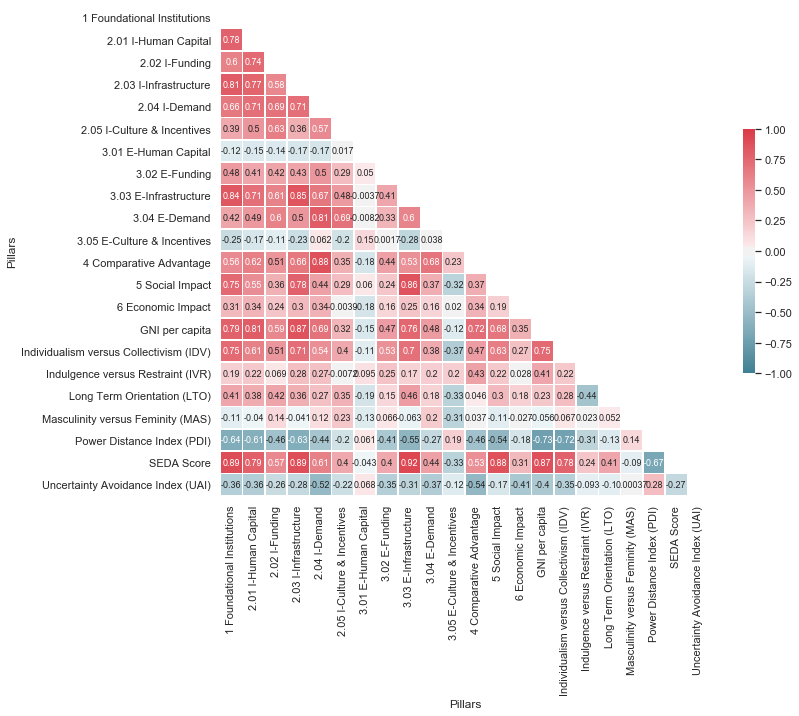

In [73]:
import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 9})

## Parte 5: Unificación de Pilares de Innovación y de Emprendimiento

Los pilares de capacidades de Innovación (2) y Emprendimiento (3) son el enfoque de esta parte del código. En particular nos interesa ver qué sucede al unificar cada uno de estos pilares, por separado, y qué sucede cuando unificamos los dos pilares. 

In [74]:
#i_e_unified = df_means.T.copy()
i_e_unified = df_imputed.T.copy()
pillars_L = pillars.copy()

for i in range(len(pillars_L)):
    if pillars_L[i][0] == '2':
        pillars_L[i] = '2 Innovation Capacity'
    elif pillars_L[i][0] == '3':
        pillars_L[i] = '3 Entrepreneurship Capacity'

i_e_unified['Pillar'] = pillars_L
i_e_unified = i_e_unified.groupby('Pillar').mean().T
        
'''
#building i_e_unified
pillars_L = ['1 Foundational Institutions']
pillars_L += ['2 Innovation Capacity']*5 
pillars_L += ['3 Entrepreneurship Capacity']*5 
pillars_L += ['4 Comparative Advantage', 
                          '5 Social Impact',
                          '6 Economic Impact']
                          'GNI per capita' ,
                          '8 SEDA Score']
pillars_L += hofstede_pillars
i_e_unified['Pillar'] = pillars_L
i_e_unified = i_e_unified.groupby('Pillar').mean().T
'''

# Unify I&E capacity - each pilars contains 5 components
combined_L=[]
for i in range(len(i_e_unified['2 Innovation Capacity'])):
    icap = i_e_unified['2 Innovation Capacity'][i]
    ecap = i_e_unified['3 Entrepreneurship Capacity'][i]
    combined_L.append(0.5*icap + 0.5*ecap)
i_e_unified['2&3 I&E Capacity'] = combined_L
#i_e_unified



# Unify S&E impact - each pilar contains 5 components
combined_L=[]
for i in range(len(i_e_unified['5 Social Impact'])):
    socim = i_e_unified['5 Social Impact'][i]
    ecoim = i_e_unified['6 Economic Impact'][i]
    combined_L.append(0.5*socim + 0.5*ecoim)
i_e_unified['5&6 Impact'] = combined_L
i_e_unified

Pillar          1 Foundational Institutions  2 Innovation Capacity  \
Country                                                              
Albania                              3.4732               2.150283   
Algeria                              3.0096               2.209405   
Argentina                            3.1684               2.198670   
Armenia                              3.6344               2.151068   
Australia                            4.3708               2.852076   
...                                     ...                    ...   
United Kingdom                       4.3396               3.249605   
United States                        4.2960               3.619171   
Uruguay                              3.7808               2.174806   
Vietnam                              3.3420               2.185353   
Zambia                               3.2760               1.999227   

Pillar          3 Entrepreneurship Capacity  4 Comparative Advantage  \
Country                                                                
Albania                            2.794764                 2.074467   
Algeria                            2.828250                 2.399133   
Argentina                          2.696591                 2.583067   
Armenia                            2.992900                 2.593067   
Australia                          3.278560                 3.316533   
...                                     ...                      ...   
United Kingdom                     3.631231                 3.884867   
United States                      4.871043                 4.095000   
Uruguay                            2.826071                 2.482667   
Vietnam                            2.927061                 2.885733   
Zambia                             2.720371                 2.633400   

Pillar          5 Social Impact  6 Economic Impact  GNI per capita  \
Country                                                              
Albania                3.935356           2.738519        1.236727   
Algeria                3.715319           2.324024        1.174866   
Argentina              3.984246           2.405071        1.527034   
Armenia                3.820191           3.070693        1.209450   
Australia              4.423548           3.275445        3.656113   
...                         ...                ...             ...   
United Kingdom         4.134732           3.079245        3.045300   
United States          3.863439           3.335960        4.184608   
Uruguay                4.495705           2.605598        1.772041   
Vietnam                3.530441           3.582663        1.105212   
Zambia                 2.647892           2.528882        1.052119   

Pillar          Individualism versus Collectivism (IDV)  \
Country                                                   
Albania                                           1.664   
Algeria                                           2.256   
Argentina                                         2.840   
Armenia                                           2.608   
Australia                                         4.600   
...                                                 ...   
United Kingdom                                    4.560   
United States                                     4.640   
Uruguay                                           2.440   
Vietnam                                           1.800   
Zambia                                            1.504   

Pillar          Indulgence versus Restraint (IVR)  \
Country                                             
Albania                                      1.60   
Algeria                                      2.28   
Argentina                                    3.48   
Armenia                                      2.04   
Australia                                    3.84   
...                                           ...   
United Kingdom                               3.76

Obtención de la matriz de correlaciones y la visualización por medio de un Heatmap:

In [75]:
corr = i_e_unified.corr()

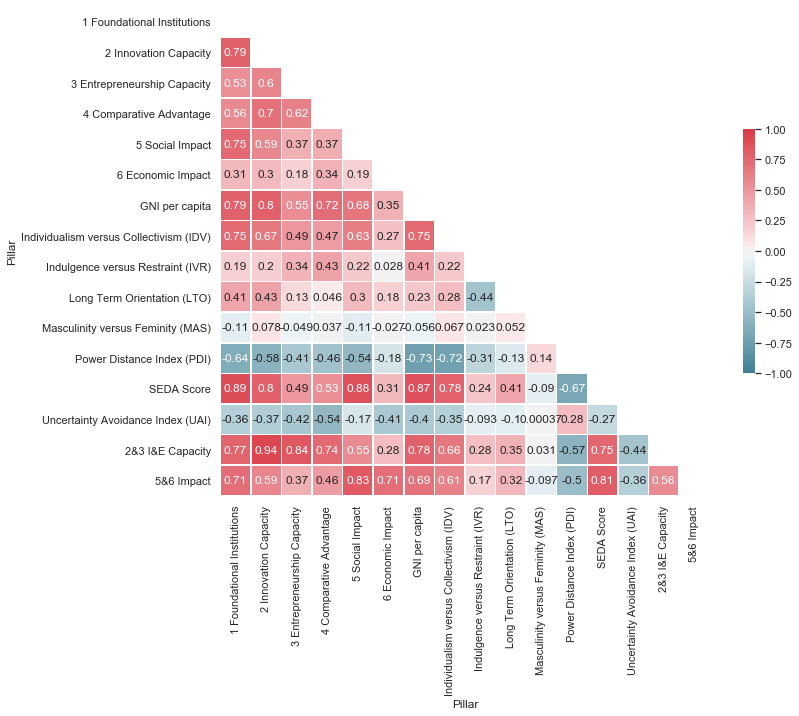

In [76]:
import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.diverging_palette(10, 190, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Para completar la lectura del Heatmap anteriormente presentado, enlistamos la lista de aquellas parejas de columnas del DataFrame `i_e_unified` que tienen una correlación significativa. 

*Nota*: las correlaciones siguientes son para el conjunto de 106 países.   

_-_-_-_-_-_-_-_
Power Distance Index (PDI)
_-_-_-_-_-_-_-_
Correlation between:  Power Distance Index (PDI)   and   5 Social Impact
**********************************************
Pearson Correlation: -0.5447348615227983, p-value: 1.5744164983988523e-09
*Statistically significant*
***********************************************




Correlation between:  Power Distance Index (PDI)   and   5&6 Impact
**********************************************
Pearson Correlation: -0.49526236766638704, p-value: 6.767828306087009e-08
*Statistically significant*
***********************************************




Correlation between:  Power Distance Index (PDI)   and   SEDA Score
**********************************************
Pearson Correlation: -0.6724124449353339, p-value: 2.956594346318602e-15
*Statistically significant*
***********************************************




Correlation between:  Power Distance Index (PDI)   and   GNI per capita
**********************************************
Pearson Cor

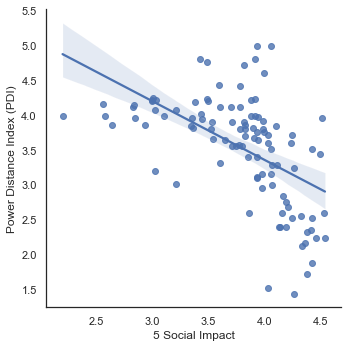

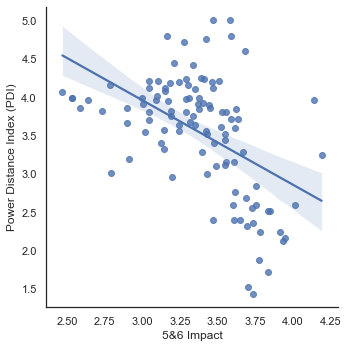

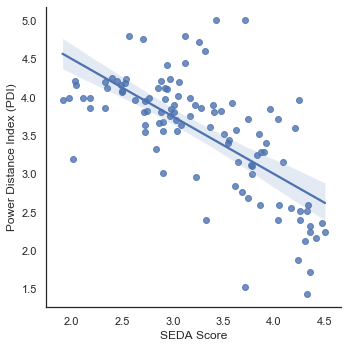

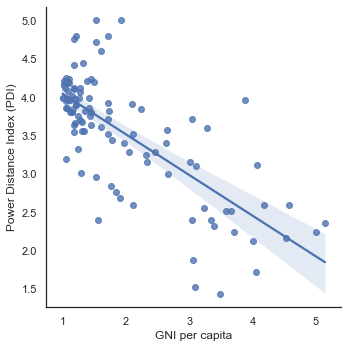

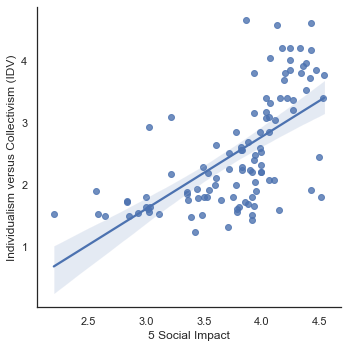

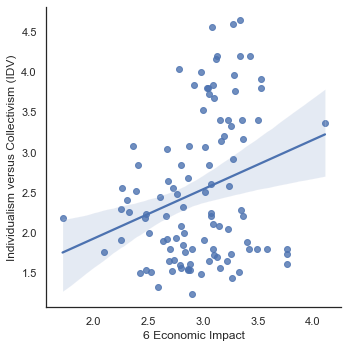

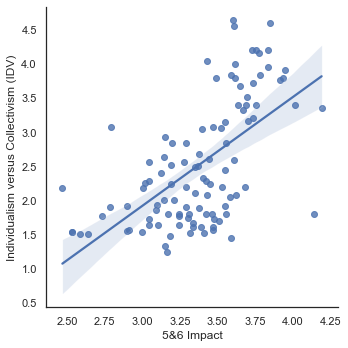

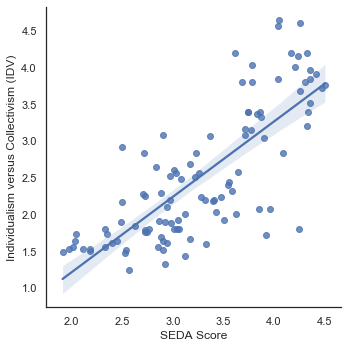

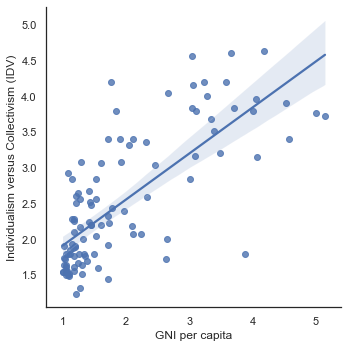

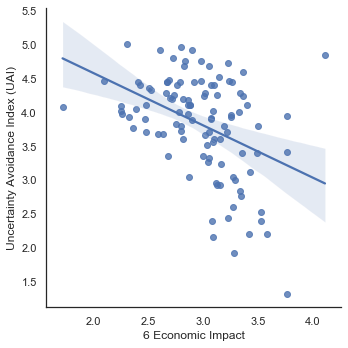

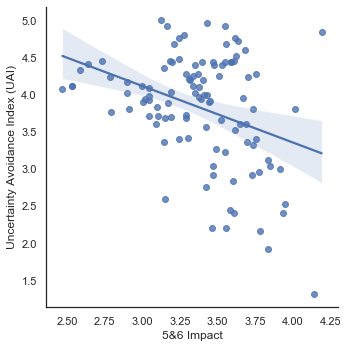

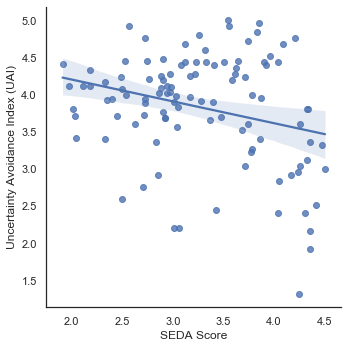

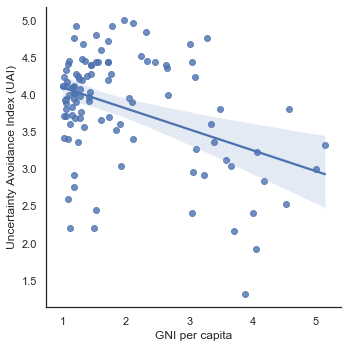

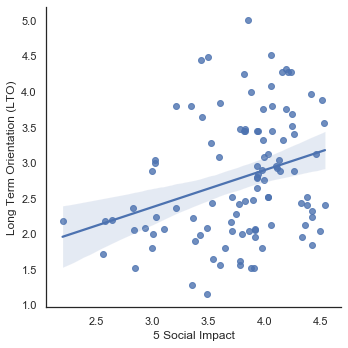

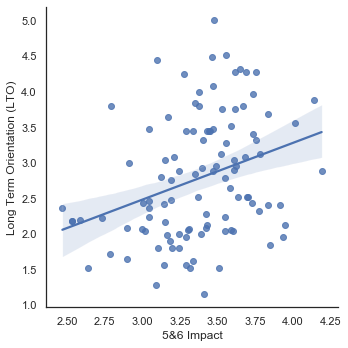

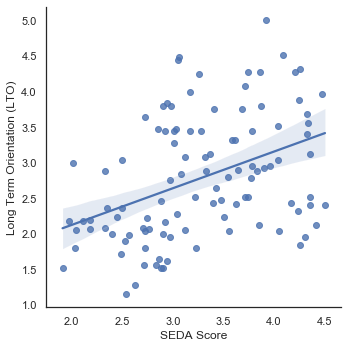

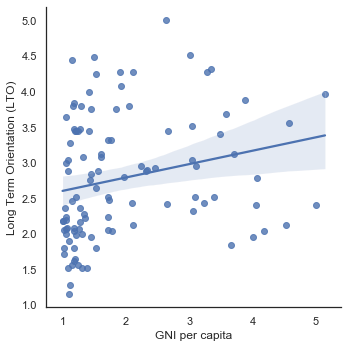

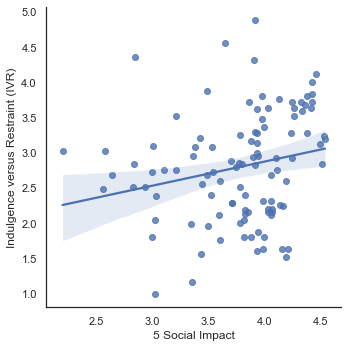

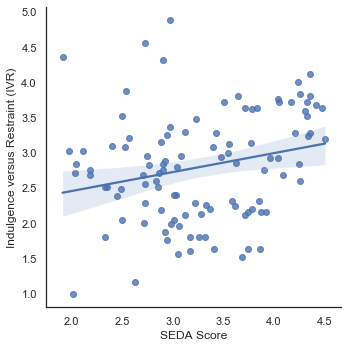

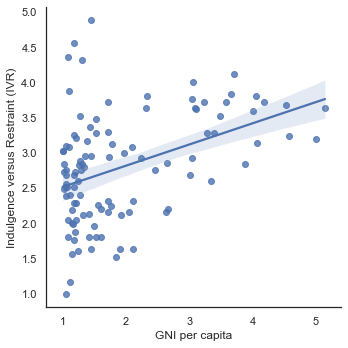

In [77]:
columns = list(i_e_unified.columns)
impacts = ['5 Social Impact', '6 Economic Impact', '5&6 Impact', 'SEDA Score', 'GNI per capita']
for c1 in hofstede_pillars:
    print('_-_-_-_-_-_-_-_')
    print(c1)
    print('_-_-_-_-_-_-_-_')
    #for c2 in columns:
    for c2 in impacts:
        if c1!=c2 and significant_corr(i_e_unified,i_e_unified,c1,c2)[0]==True:
            #correl = significant_corr(i_e_unified,i_e_unified,c1,c2)
            #print(c2, np.round(correl[1],4), correl[2])
            print_significant_corr(i_e_unified,i_e_unified,c1,c2)
            print('')
            print('')
            print('')

In [78]:
from IPython.core import display as ICD

columns = list(i_e_unified.columns)
impacts = ['5 Social Impact', '6 Economic Impact', '5&6 Impact', 'SEDA Score', 'GNI per capita']
for c1 in hofstede_pillars:
    print('***********')
    print(c1)
    print('***********')
    ICD.display( significant_corr_many(i_e_unified,i_e_unified,c1,impacts, 'Type of Impact') )
    print('')



***********
Power Distance Index (PDI)
***********


Type of Impact  Pearson Correlation        Pvalue
0  5 Social Impact            -0.544735  1.574416e-09
1       5&6 Impact            -0.495262  6.767828e-08
2       SEDA Score            -0.672412  2.956594e-15
3   GNI per capita            -0.727133  1.090410e-18


***********
Individualism versus Collectivism (IDV)
***********


Type of Impact  Pearson Correlation        Pvalue
0    5 Social Impact             0.632531  3.512543e-13
1  6 Economic Impact             0.266626  5.731989e-03
2         5&6 Impact             0.607041  5.270348e-12
3         SEDA Score             0.775960  1.539313e-22
4     GNI per capita             0.745793  4.676138e-20


***********
Masculinity versus Feminity (MAS)
***********


Empty DataFrame
Columns: [Type of Impact, Pearson Correlation, Pvalue]
Index: []


***********
Uncertainty Avoidance Index (UAI)
***********


Type of Impact  Pearson Correlation    Pvalue
0  6 Economic Impact            -0.413451  0.000011
1         5&6 Impact            -0.356910  0.000173
2         SEDA Score            -0.274591  0.004392
3     GNI per capita            -0.402410  0.000019


***********
Long Term Orientation (LTO)
***********


Type of Impact  Pearson Correlation    Pvalue
0  5 Social Impact             0.298632  0.001875
1       5&6 Impact             0.318412  0.000880
2       SEDA Score             0.410343  0.000013
3   GNI per capita             0.229098  0.018164


***********
Indulgence versus Restraint (IVR)
***********


Type of Impact  Pearson Correlation    Pvalue
0  5 Social Impact             0.220290  0.023263
1       SEDA Score             0.240204  0.013132
2   GNI per capita             0.411046  0.000012

## Parte 6: Correlación de métricas de colaboración con Impacto

Estudiaremos qué correlaciones tienen cada una de las métricas de colaboratividad con aquellas de impacto. 

Para ello, vamos a ordenar los datos de los pilares de Impacto Social y Económico de:
* Argentina
* Brasil
* Chile
* España
* México
* Uruguay

Y vamos a leer la correlación de ambos impactos con cada una de las 11 métricas de colaboratividad con que contamos. Es decir, la métrica original y las 10 propuestas.

In [79]:
# primero conseguimos los datos de los 6 países estudiados
countries={'Mexico':'México',
          'Uruguay':'Uruguay',
          'Spain':'España',
          'Brazil':'Brasil',
          'Argentina':'Argentina',
          'Chile':'Chile'}
df_means_countries_studied = df_means.loc[list(countries.keys()), :]
df_means_countries_studied.rename(index=countries, inplace=True)

df1 = df_means_countries_studied[['5 Social Impact', 
                                  '6 Economic Impact',
                                  'GNI per capita',
                                  'SEDA Score',
                                  'Power Distance Index (PDI)',
                                  'Individualism versus Collectivism (IDV)', 
                                  'Masculinity versus Feminity (MAS)',
                                  'Uncertainty Avoidance Index (UAI)',
                                  'Long Term Orientation (LTO)', 
                                  'Indulgence versus Restraint (IVR)']]

#DataFrame con 5&6 Impacto
df_before_impact_split = pd.read_csv('Referenced_CSVs/PromediosPilares.csv')
df_before_impact_split.rename(columns={'Unnamed: 0':'Country', '5 Impact':'5&6 Impact'}, inplace=True)
df_before_impact_split.set_index('Country', inplace=True)
df2=df_before_impact_split[['5&6 Impact']]

#now we obtain colaborativities for each city
capitals = ['CABA', 'CDMX', 'Santiago', 'Montevideo', 'Madrid', 'Sao Paulo']
df3 = pd.read_csv('Referenced_CSVs/Ranking_cities.csv')[['Ciudad', 'País', 'Colab 10', 'Colab 10 rescaled', 'Ranking 10', 'Ranking Capitals 10']]
df3 = df3.loc[df3['Ciudad'].isin(capitals)]
df3 = df3.drop('Ciudad', axis=1)
df3.rename(columns={'País':'Country'}, inplace=True)
df3.set_index('Country', inplace=True)

#df1
#df2
#df3


#and finally we concatenate!
df_countries_studied = pd.concat([df1, df2, df3], axis=1)
df_countries_studied

5 Social Impact  6 Economic Impact  GNI per capita  SEDA Score  \
México            3.916166           2.665218        1.440818       2.968   
Uruguay           4.495705           2.605598        1.772041       3.560   
España            4.111115           2.675696        2.461763       3.900   
Brasil            3.996738           2.389177        1.426206       2.972   
Argentina         3.984246           2.405071        1.527034       3.232   
Chile             4.424643           2.676299        1.712616       3.504   

           Power Distance Index (PDI)  \
México                           4.24   
Uruguay                          3.44   
España                           3.28   
Brasil                           3.76   
Argentina                        2.96   
Chile                            3.52   

           Individualism versus Collectivism (IDV)  \
México                                        2.20   
Uruguay                                       2.44   
España                                        3.04   
Brasil                                        2.52   
Argentina                                     2.84   
Chile                                         1.92   

           Masculinity versus Feminity (MAS)  \
México                                  3.76   
Uruguay                                 2.52   
España                                  2.68   
Brasil                                  2.96   
Argentina                               3.24   
Chile                                   2.12   

           Uncertainty Avoidance Index (UAI)  Long Term Orientation (LTO)  \
México                                  4.28                         1.96   
Uruguay                                 4.92                         2.04   
España                                  4.44                         2.92   
Brasil                                  4.04                         2.76   
Argentina                               4.44                         1.80   
Chile                                   4.44                         2.24   

           Indulgence versus Restraint (IVR)  5&6 Impact  Colab 10  \
México                                  4.88    3.725455  0.397667   
Uruguay                                 3.12    4.147576  0.588490   
España                                  2.76    3.864545  0.426240   
Brasil                                  3.36    3.671818  0.384944   
Argentina                               3.48    3.781818  0.492850   
Chile                                   3.72    4.091818  0.480988   

           Colab 10 rescaled  Ranking 10  Ranking Capitals 10  
México              4.976668          10                  5.0  
Uruguay             6.884901           2                  1.0  
España              5.262402           8                  4.0  
Brasil              4.849443          11                  6.0  
Argentina           5.928502           3                  2.0  
Chile               5.809878           4                  3.0

In [80]:
impacts = ['5 Social Impact', '6 Economic Impact', '5&6 Impact', 'GNI per capita', 'SEDA Score']
others = list(i_e_unified.columns)
for i in impacts:
    others.remove(i)
    
significants = {x:[] for x in impacts}


df_correls = pd.DataFrame()
df_correls['Correl data'] = others
for i in impacts:
    booleans_i = []
    correls_i = []
    p_vals_i = []
    for c in others:
        triple = significant_corr(i_e_unified,i_e_unified,i,c)
        booleans_i.append(triple[0])
        correls_i.append(triple[1])
        p_vals_i.append(triple[2])
        if triple[0]==True:
            significants[i].append(c)
    df_correls['Significant with '+str(i)] = booleans_i
    df_correls['R^2 with '+str(i)] = correls_i
    df_correls['P-value with '+str(i)] = p_vals_i

    
df_correls       

Correl data  Significant with 5 Social Impact  \
0               1 Foundational Institutions                              True   
1                     2 Innovation Capacity                              True   
2               3 Entrepreneurship Capacity                              True   
3                   4 Comparative Advantage                              True   
4   Individualism versus Collectivism (IDV)                              True   
5         Indulgence versus Restraint (IVR)                              True   
6               Long Term Orientation (LTO)                              True   
7         Masculinity versus Feminity (MAS)                             False   
8                Power Distance Index (PDI)                              True   
9         Uncertainty Avoidance Index (UAI)                             False   
10                         2&3 I&E Capacity                              True   

    R^2 with 5 Social Impact  P-value with 5 Social Impact  \
0                   0.745562                  4.870233e-20   
1                   0.585575                  4.306874e-11   
2                   0.365156                  1.187382e-04   
3                   0.372081                  8.587891e-05   
4                   0.632531                  3.512543e-13   
5                   0.220290                  2.326319e-02   
6                   0.298632                  1.874514e-03   
7                  -0.112756                  2.498109e-01   
8                  -0.544735                  1.574416e-09   
9                  -0.168420                  8.438598e-02   
10                  0.554702                  6.839377e-10   

    Significant with 6 Economic Impact  R^2 with 6 Economic Impact  \
0                                 True                    0.312428   
1                                 True                    0.300101   
2                                False                    0.181777   
3                                 True                    0.343901   
4                                 True                    0.266626   
5                                False                    0.027976   
6                                False                    0.181673   
7                                False                   -0.027401   
8                                False                   -0.181354   
9                                 True                   -0.413451   
10                                True                    0.281914   

    P-value with 6 Economic Impact  Significant with 5&6 Impact  \
0                         0.001112                         True   
1                         0.001775                         True   
2                         0.062197                         True   
3                         0.000307                         True   
4                         0.005732                         True   
5                         0.775894                        False   
6                         0.062349                         True   
7                         0.780385                        False   
8                         0.062818                         True   
9                         0.000011                         True   
10                        0.003415                         True   

    R^2 with 5&6 Impact  P-value with 5&6 Impact  \
0              0.714467             8.005771e-18   
1              0.592352             2.256263e-11   
2              0.366325             1.124778e-04   
3              0.463753             5.540241e-07   
4              0.607041             5.270348e-12   
5              0.174417             7.374860e-02   
6              0.318412             8.797426e-04   
7             -0.096735             3.239097e-01   
8             -0.495262             6.767828e-08   
9             -0.356910             1.729877e-04   
10             0.559773             4.427668e-10   

    Significant with GNI per capita  R^2 wi

## Parte 7: Correlación de iEcos con métricas de los grafos

Hacemos lo mismo de arriba, solo que esta vez incluiremos todas las métricas de los grafos, y todas las métricas de iEcosystems. Sin y con unificación de las Capacidades de Innovación y Emprendimiento.

#### Sin unificación

Primero conseguimos 
  *  `df1`: los datos de los 6 países estudiados
  *  `df2`: columna mostrando la medida de impacto anterior a la separación en impacto social y económico
  *  `df3`: información de las colaboratividades de cada ciudad

Y luego, los unificamos en `df_i_e_separate`, un DataFrame que seguiremos estudiando.

In [81]:
#DF1 df_means restringido a los 6 paises estudiados
countries={'Mexico':'México', 'Uruguay':'Uruguay', 'Spain':'España', 'Brazil':'Brasil', 'Argentina':'Argentina', 'Chile':'Chile'}
df_means_countries_studied = df_means.loc[list(countries.keys()), :]
df_means_countries_studied.rename(index=countries, inplace=True)
df1 = df_means_countries_studied

#DF3 vieja medida de impacto
df_before_impact_split = pd.read_csv('Referenced_CSVs/PromediosPilares.csv')
df_before_impact_split.rename(columns={'Unnamed: 0':'Country', '5 Impact':'Impact Before'}, inplace=True)
df_before_impact_split.set_index('Country', inplace=True)
df2=df_before_impact_split[['Impact Before']]

#DF3 colaboratividad por ciudad 
capitals = ['CABA', 'CDMX', 'Santiago', 'Montevideo', 'Madrid', 'Sao Paulo']
df3 = pd.read_csv('Referenced_CSVs/Ranking_cities.csv')
df3 = df3[['Ciudad', 'País', 'Colab 10', 'Ranking Capitals 10']]
df3 = df3.loc[df3['Ciudad'].isin(capitals)]
df3 = df3.drop('Ciudad', axis=1)
df3.rename(columns={'País':'Country'}, inplace=True)
df3.set_index('Country', inplace=True)

#df1
#df2
#df3


#and finally we concatenate!
df_i_e_separate = pd.concat([df1, df2, df3], axis=1)
df_i_e_separate

1 Foundational Institutions  2.01 I-Human Capital  2.02 I-Funding  \
México                          3.5224              2.363914        1.238062   
Uruguay                         3.7808              2.346297        1.464989   
España                          3.9268              2.822386        1.899159   
Brasil                          3.1780              1.826706        1.675010   
Argentina                       3.1684              2.021985        1.682002   
Chile                           3.9124              2.399177        1.184934   

           2.03 I-Infrastructure  2.04 I-Demand  2.05 I-Culture & Incentives  \
México                  2.782979       3.102667                       2.5160   
Uruguay                 2.833698       2.578222                       1.2428   
España                  3.191020       3.077333                       3.8300   
Brasil                  2.707140       2.879111                       2.7542   
Argentina               2.740698       2.729778                       1.7930   
Chile                   3.100109       2.965778                       1.9536   

           3.01 E-Human Capital  3.02 E-Funding  3.03 E-Infrastructure  \
México                 3.117368        2.299475               3.701600   
Uruguay                3.046434        2.006035               3.926000   
España                 3.189806        2.423851               4.264933   
Brasil                 2.975761        1.991287               3.694933   
Argentina              3.076940        1.725475               3.679067   
Chile                  4.154179        2.207990               3.935067   

           3.04 E-Demand  ...  Individualism versus Collectivism (IDV)  \
México            3.4260  ...                                     2.20   
Uruguay           2.7408  ...                                     2.44   
España            3.3650  ...                                     3.04   
Brasil            3.4638  ...                                     2.52   
Argentina         3.1718  ...                                     2.84   
Chile             3.2030  ...                                     1.92   

           Indulgence versus Restraint (IVR)  Long Term Orientation (LTO)  \
México                                  4.88                         1.96   
Uruguay                                 3.12                         2.04   
España                                  2.76                         2.92   
Brasil                                  3.36                         2.76   
Argentina                               3.48                         1.80   
Chile                                   3.72                         2.24   

           Masculinity versus Feminity (MAS)  Power Distance Index (PDI)  \
México                                  3.76                        4.24   
Uruguay                                 2.52                        3.44   
España                                  2.68                        3.28   
Brasil                                  2.96                        3.76   
Argentina                               3.24                        2.96   
Chile                                   2.12                        3.52   

           SEDA Score  Uncertainty Avoidance Index (UAI)  Impact Before  \
México          2.968                               4.28       3.725455   
Uruguay         3.560                               4.92       4.147576   
España          3.900                               4.44       3.864545   
Brasil          2.972                               4.04       3.671818   
Argentina       3.232                               4.44       3.781818   
Chile           3.504                               4.44       4.091818   

           Colab 10  Ranking Capitals 10  
México     0.397667                  5.0  
Uruguay    0.588490                  1.0  
España     0.426240                  4.0  
Brasil     0.384944                  6.0  
Argentina  0.492850                  

#### Con unificación I&E

Primero conseguimos 
  *  `df1`: los datos de los 6 países estudiados, con Innovación y Emprendimiento unificados
  *  `df2`: columna mostrando la medida de impacto anterior a la separación en impacto social y económico
  *  `df3`: información de las colaboratividades de cada ciudad

Y luego, los unificamos en `df_i_e_unified`, un DataFrame que seguiremos estudiando.

In [82]:
#DF1 i_e_unified restringido a los 6 paises estudiados
countries={'Mexico':'México', 'Uruguay':'Uruguay', 'Spain':'España', 'Brazil':'Brasil', 'Argentina':'Argentina', 'Chile':'Chile'}
df_means_countries_studied = i_e_unified.loc[list(countries.keys()), :]
df_means_countries_studied.rename(index=countries, inplace=True)
df1 = df_means_countries_studied

#DF3 vieja medida de impacto
df_before_impact_split = pd.read_csv('Referenced_CSVs/PromediosPilares.csv')
df_before_impact_split.rename(columns={'Unnamed: 0':'Country', '5 Impact':'Impact Before'}, inplace=True)
df_before_impact_split.set_index('Country', inplace=True)
df2=df_before_impact_split[['Impact Before']]

#DF3 colaboratividad por ciudad 
capitals = ['CABA', 'CDMX', 'Santiago', 'Montevideo', 'Madrid', 'Sao Paulo']
df3 = pd.read_csv('Referenced_CSVs/Ranking_cities.csv')
df3 = df3[['Ciudad', 'País', 'Colab 10', 'Ranking Capitals 10']]  #

for i in range(len(df3['Ranking Capitals 10'])):
    df3['Ranking Capitals 10'][i] *= -1
    df3['Ranking Capitals 10'][i] += 7

df3 = df3.loc[df3['Ciudad'].isin(capitals)]                       #only take capital cities
df3 = df3.drop('Ciudad', axis=1)
df3.rename(columns={'País':'Country', 'Ranking Capitals 10':'Inverted Ranking Capitals 10'}, inplace=True)
df3.set_index('Country', inplace=True)

#df1
#df2
#df3


#and finally we concatenate!
df_i_e_unified = pd.concat([df1, df2, df3], axis=1)
df_i_e_unified

1 Foundational Institutions  2 Innovation Capacity  \
México                          3.5224               2.346874   
Uruguay                         3.7808               2.174806   
España                          3.9268               2.853591   
Brasil                          3.1780               2.267103   
Argentina                       3.1684               2.198670   
Chile                           3.9124               2.330033   

           3 Entrepreneurship Capacity  4 Comparative Advantage  \
México                        2.932019                 2.928133   
Uruguay                       2.826071                 2.482667   
España                        2.954476                 2.839333   
Brasil                        2.956201                 2.741067   
Argentina                     2.696591                 2.583067   
Chile                         3.188631                 3.111200   

           5 Social Impact  6 Economic Impact  GNI per capita  \
México            3.916166           2.665218        1.440818   
Uruguay           4.495705           2.605598        1.772041   
España            4.111115           2.675696        2.461763   
Brasil            3.996738           2.389177        1.426206   
Argentina         3.984246           2.405071        1.527034   
Chile             4.424643           2.676299        1.712616   

           Individualism versus Collectivism (IDV)  \
México                                        2.20   
Uruguay                                       2.44   
España                                        3.04   
Brasil                                        2.52   
Argentina                                     2.84   
Chile                                         1.92   

           Indulgence versus Restraint (IVR)  Long Term Orientation (LTO)  \
México                                  4.88                         1.96   
Uruguay                                 3.12                         2.04   
España                                  2.76                         2.92   
Brasil                                  3.36                         2.76   
Argentina                               3.48                         1.80   
Chile                                   3.72                         2.24   

           Masculinity versus Feminity (MAS)  Power Distance Index (PDI)  \
México                                  3.76                        4.24   
Uruguay                                 2.52                        3.44   
España                                  2.68                        3.28   
Brasil                                  2.96                        3.76   
Argentina                               3.24                        2.96   
Chile                                   2.12                        3.52   

           SEDA Score  Uncertainty Avoidance Index (UAI)  2&3 I&E Capacity  \
México          2.968                               4.28          2.639447   
Uruguay         3.560                               4.92          2.500438   
España          3.900                               4.44          2.904034   
Brasil          2.972                               4.04          2.611652   
Argentina       3.232                               4.44          2.447630   
Chile           3.504                               4.44          2.759332   

           5&6 Impact  Impact Before  Colab 10  Inverted Ranking Capitals 10  
México       3.290692       3.725455  0.397667                           2.0  
Uruguay      3.550652       4.147576  0.588490                           6.0  
España       3.393406       3.864545  0.426240                           3.0  
Brasil       3.192957       3.671818  0.384944                           1.0  
Argentina    3.194659       3.781818  0.492850                           5.0  
Chile        3.550471       4.091818  0.480988                           4.0

***********************************************
Innovation and Entrepreneurship Separated
***********************************************


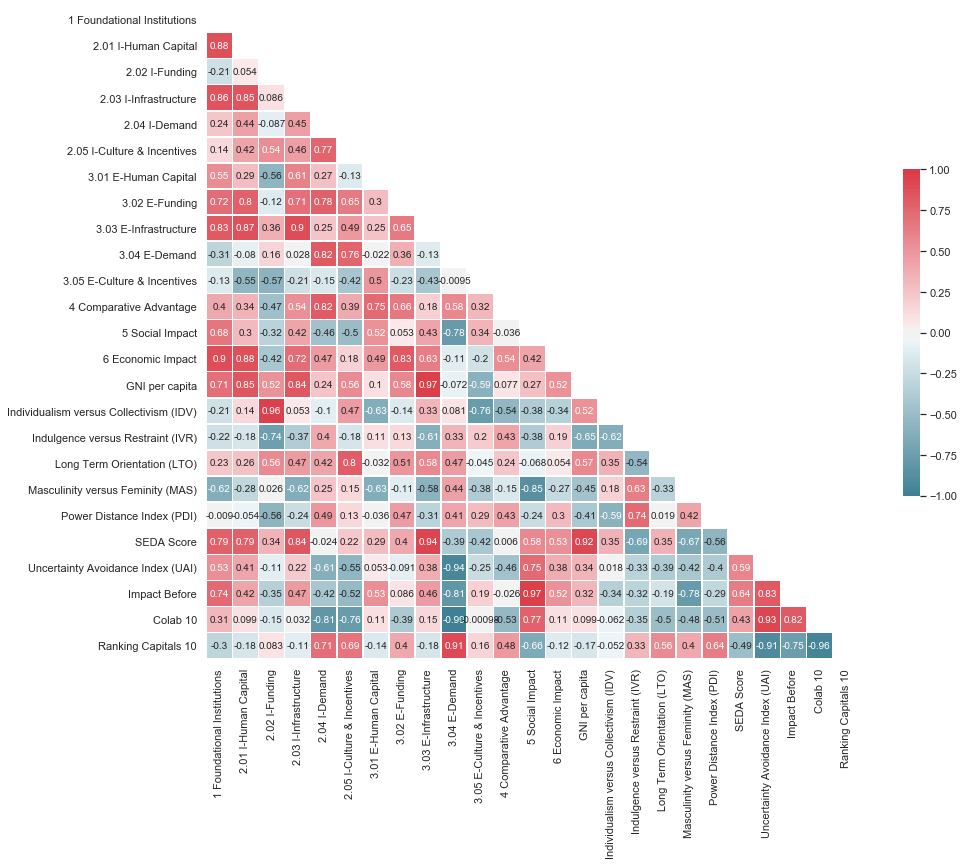

In [83]:
print('***********************************************')
print('Innovation and Entrepreneurship Separated')
print('***********************************************')

corr = df_i_e_separate.corr()

import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5}, annot_kws={'size':10})

***********************************************
Innovation and Entrepreneurship Unified
***********************************************


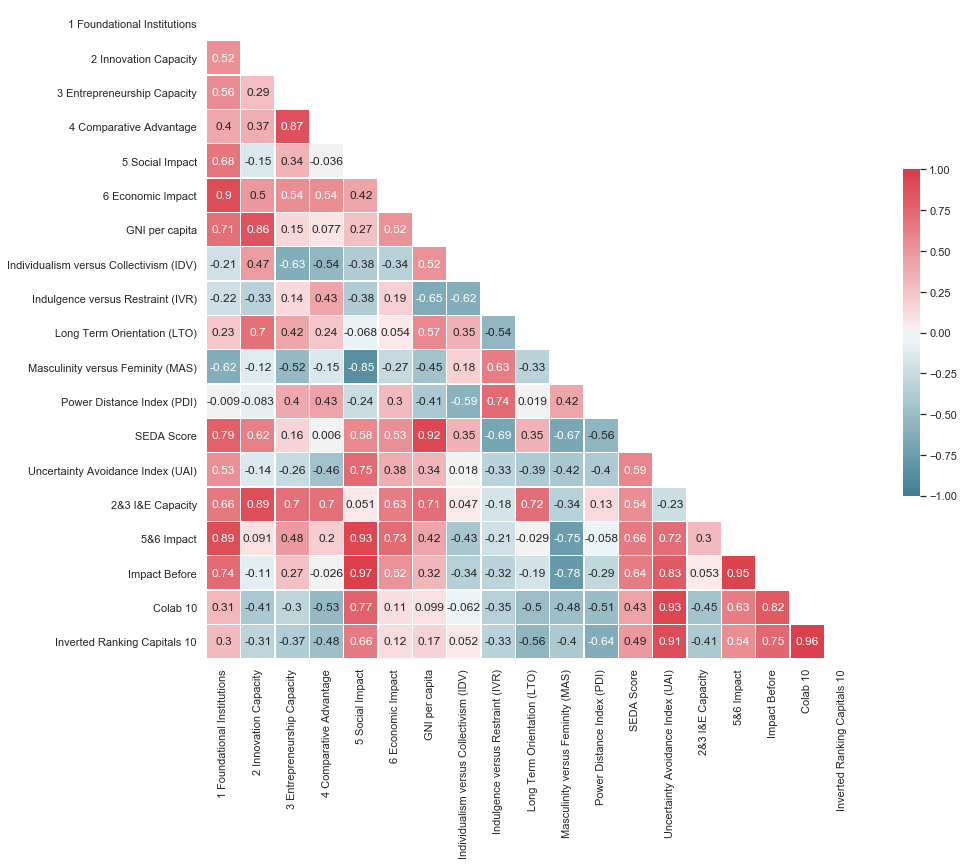

In [84]:
print('***********************************************')
print('Innovation and Entrepreneurship Unified')
print('***********************************************')

corr = df_i_e_unified.corr()

import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})

In [85]:
print('***********************************************')
print('Metrics, iEco, and Hofstede DataFrame')
print('***********************************************')

all_df=df_i_e_unified.copy()
placeholder=pd.read_csv('Referenced_CSVs/Tidy_DataFrame.csv')
capitalnames = ['CDMX', 'CABA', 'Santiago', 'Sao Paulo', 'Madrid', 'Montevideo']
placeholder = placeholder.loc[placeholder['Ciudad'].isin(capitalnames)]

#index: País
placeholder = placeholder.drop('Ciudad',axis=1)
placeholder.set_index('País', inplace=True)

all_df=pd.concat([all_df,placeholder],axis=1)
all_df=all_df.drop('Weighted Degree',axis=1)
all_df=all_df.drop('weight',axis=1)
all_df=all_df.drop('Camino más corto promedio',axis=1)
for i in range(15):
    all_df=all_df.drop('Colab '+str(i),axis=1)
all_df

***********************************************
Metrics, iEco, and Hofstede DataFrame
***********************************************


1 Foundational Institutions  2 Innovation Capacity  \
México                          3.5224               2.346874   
Uruguay                         3.7808               2.174806   
España                          3.9268               2.853591   
Brasil                          3.1780               2.267103   
Argentina                       3.1684               2.198670   
Chile                           3.9124               2.330033   

           3 Entrepreneurship Capacity  4 Comparative Advantage  \
México                        2.932019                 2.928133   
Uruguay                       2.826071                 2.482667   
España                        2.954476                 2.839333   
Brasil                        2.956201                 2.741067   
Argentina                     2.696591                 2.583067   
Chile                         3.188631                 3.111200   

           5 Social Impact  6 Economic Impact  GNI per capita  \
México            3.916166           2.665218        1.440818   
Uruguay           4.495705           2.605598        1.772041   
España            4.111115           2.675696        2.461763   
Brasil            3.996738           2.389177        1.426206   
Argentina         3.984246           2.405071        1.527034   
Chile             4.424643           2.676299        1.712616   

           Individualism versus Collectivism (IDV)  \
México                                        2.20   
Uruguay                                       2.44   
España                                        3.04   
Brasil                                        2.52   
Argentina                                     2.84   
Chile                                         1.92   

           Indulgence versus Restraint (IVR)  Long Term Orientation (LTO)  \
México                                  4.88                         1.96   
Uruguay                                 3.12                         2.04   
España                                  2.76                         2.92   
Brasil                                  3.36                         2.76   
Argentina                               3.48                         1.80   
Chile                                   3.72                         2.24   

           ...  Transitividad  Eficiencia Global  Small Worldness  \
México     ...       0.050000           0.289320         0.614973   
Uruguay    ...       0.224523           0.360837         1.197588   
España     ...       0.081917           0.294653         0.930159   
Brasil     ...       0.078571           0.266719         1.071208   
Argentina  ...       0.107392           0.325773         1.006481   
Chile      ...       0.100744           0.338889         1.051860   

           Rich Club Coefficient  Core Ratio  Central Point Dominance  \
México                  0.361111    0.421405                    0.202   
Uruguay                 1.000000    0.565657                    0.179   
España                  1.000000    0.439331                    0.184   
Brasil                  0.222222    0.421296                    0.237   
Argentina               0.866667    0.495614                    0.251   
Chile                   1.000000    0.430769                    0.525   

           Spectral radius  Modularidad  Average Collaborations  \
México               1.910        0.623                   12.33   
Uruguay              1.778        0.356                   13.40   
España               1.920        0.606                   12.13   
Brasil               1.983        0.682                   10.38   
Argentina            1.868        0.527                   13.48   
Chile                1.890        0.535                   13.04   

           Colab 10 rescaled  
México              4.976668  
Uruguay             6.884901  
España              5.262402  
Brasil              4.849443  
Argentina           5.928502  
Chile               5.809878  

[6 rows x 34 columns]

***********************************************
Graph metrics, iEco, and Hofstede Correlations
***********************************************


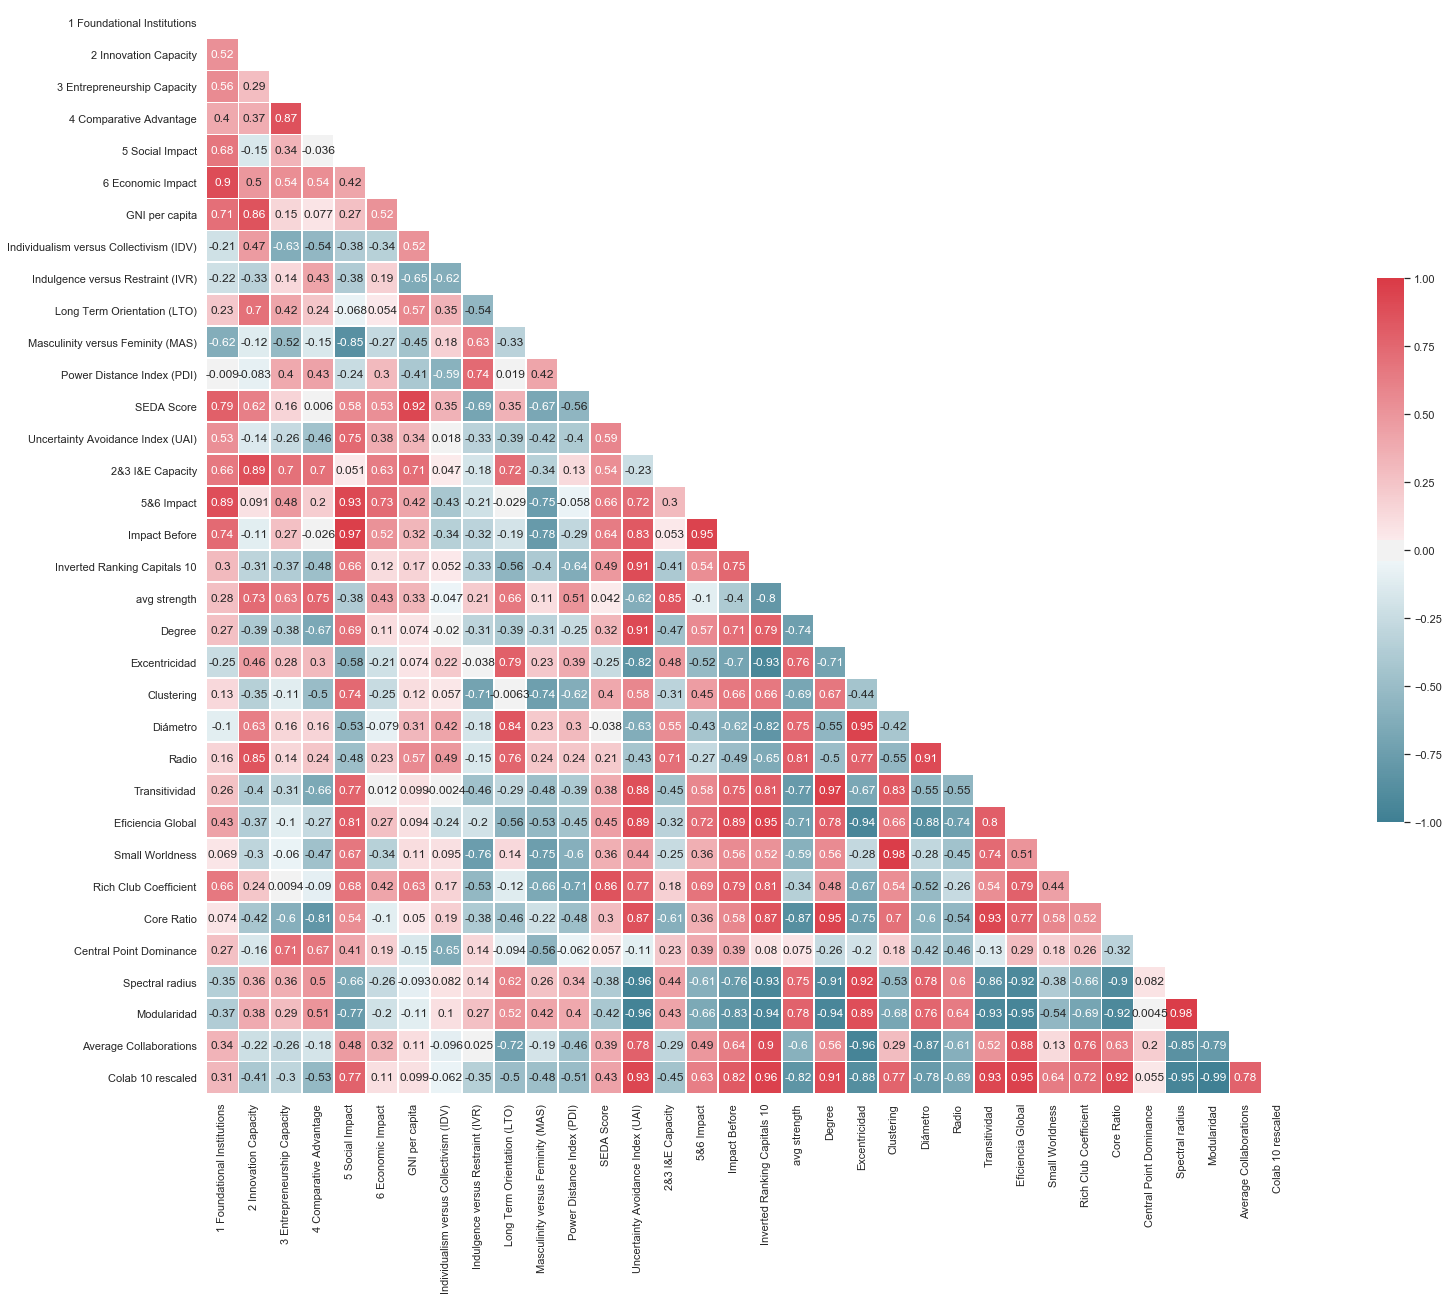

In [86]:
print('***********************************************')
print('Graph metrics, iEco, and Hofstede Correlations')
print('***********************************************')

corr = all_df.corr()

import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})

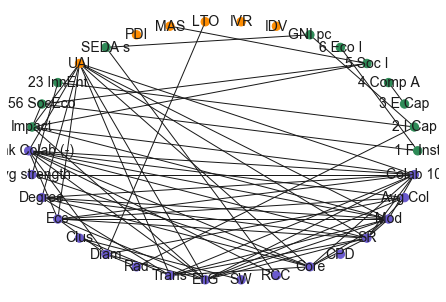

In [87]:
def visualize_heatmap(df, color_sets=None, c_labels=None):
    '''
    correl_df :     Pandas DataFrame in which correlations between 
    aggrupations :  Dictionary, mapping  
    '''
    G = nx.Graph()
    columns=df.columns
    for c in columns:
        G.add_node(c)
    for c1 in columns:
        for c2 in columns:
            s = significant_corr(df,df,c1,c2)
            if c1!=c2 and s[0]==True:
                G.add_edge(c1, c2, pearson=s[1], pval=s[2])
    #print(columns)   
    color_code = None
    if color_sets!=None:
        color_code = [color_sets[c] for c in columns]
        
    nx.draw_circular(G, with_labels=True, node_size=70, node_color=color_code, labels=c_labels, font_size=14)  # use spring layout
    return

color_dict = {'1 Foundational Institutions': '#2E8B57',
                   '2 Innovation Capacity': '#2E8B57',
                   '3 Entrepreneurship Capacity': '#2E8B57',
                   '4 Comparative Advantage': '#2E8B57',
                   '5 Social Impact': '#2E8B57', 
                   '6 Economic Impact': '#2E8B57',
                   'GNI per capita': '#2E8B57',
                   'Individualism versus Collectivism (IDV)': '#FF8C00',
                   'Indulgence versus Restraint (IVR)': '#FF8C00', 
                   'Long Term Orientation (LTO)': '#FF8C00',
                   'Masculinity versus Feminity (MAS)': '#FF8C00',
                   'Power Distance Index (PDI)': '#FF8C00',
                   'SEDA Score': '#2E8B57', 
                   'Uncertainty Avoidance Index (UAI)': '#FF8C00', 
                   '2&3 I&E Capacity': '#2E8B57',
                   '5&6 Impact': '#2E8B57', 
                   'Impact Before': '#2E8B57', 
                   'Inverted Ranking Capitals 10': '#6A5ACD',
                   'avg strength': '#6A5ACD', 
                   'Degree': '#6A5ACD', 
                   'Excentricidad': '#6A5ACD', 
                   'Clustering': '#6A5ACD', 
                   'Diámetro': '#6A5ACD',
                   'Radio': '#6A5ACD', 
                   'Transitividad': '#6A5ACD',
                   'Eficiencia Global': '#6A5ACD', 
                   'Small Worldness': '#6A5ACD',
                   'Rich Club Coefficient': '#6A5ACD', 
                   'Core Ratio': '#6A5ACD', 
                   'Central Point Dominance': '#6A5ACD',
                   'Spectral radius': '#6A5ACD', 
                   'Modularidad': '#6A5ACD', 
                   'Average Collaborations': '#6A5ACD',
                   'Colab 10 rescaled': '#6A5ACD'}

label_dict = {'1 Foundational Institutions': '1 F Inst',
                   '2 Innovation Capacity': '2 I Cap',
                   '3 Entrepreneurship Capacity': '3 E Cap',
                   '4 Comparative Advantage': '4 Comp A',
                   '5 Social Impact': '5 Soc I', 
                   '6 Economic Impact': '6 Eco I',
                   'GNI per capita': 'GNI pc',
                   'Individualism versus Collectivism (IDV)': 'IDV',
                   'Indulgence versus Restraint (IVR)': 'IVR', 
                   'Long Term Orientation (LTO)': 'LTO',
                   'Masculinity versus Feminity (MAS)': 'MAS',
                   'Power Distance Index (PDI)': 'PDI',
                   'SEDA Score': 'SEDA s', 
                   'Uncertainty Avoidance Index (UAI)': 'UAI', 
                   '2&3 I&E Capacity': '23 InnEnt',
                   '5&6 Impact': '56 SocEco', 
                   'Impact Before': 'Impact', 
                   'Inverted Ranking Capitals 10': 'Rank Colab (-)',
                   'avg strength': 'avg strength', 
                   'Degree': 'Degree', 
                   'Excentricidad': 'Ecc', 
                   'Clustering': 'Clus', 
                   'Diámetro': 'Diam',
                   'Radio': 'Rad', 
                   'Transitividad': 'Trans',
                   'Eficiencia Global': 'EfiG', 
                   'Small Worldness': 'SW',
                   'Rich Club Coefficient': 'RCC', 
                   'Core Ratio': 'Core', 
                   'Central Point Dominance': 'CPD',
                   'Spectral radius': 'SR', 
                   'Modularidad': 'Mod', 
                   'Average Collaborations': 'Avg Col',
                   'Colab 10 rescaled': 'Colab 10'}

visualize_heatmap(all_df, color_sets=color_dict, c_labels=label_dict)

    
    

********
Power Distance Index (PDI)
********
********
Individualism versus Collectivism (IDV)
********
********
Masculinity versus Feminity (MAS)
********
Correlation between:  Masculinity versus Feminity (MAS)   and   5 Social Impact
**********************************************
Pearson Correlation: -0.852481026873602, p-value: 0.0310376284551297
*Statistically significant*
***********************************************


********
Uncertainty Avoidance Index (UAI)
********
Correlation between:  Uncertainty Avoidance Index (UAI)   and   Impact Before
**********************************************
Pearson Correlation: 0.8344229960197125, p-value: 0.038853907973470894
*Statistically significant*
***********************************************


Correlation between:  Uncertainty Avoidance Index (UAI)   and   Colab 10 rescaled
**********************************************
Pearson Correlation: 0.9335816841623401, p-value: 0.006470590381957427
*Statistically significant*
*****************

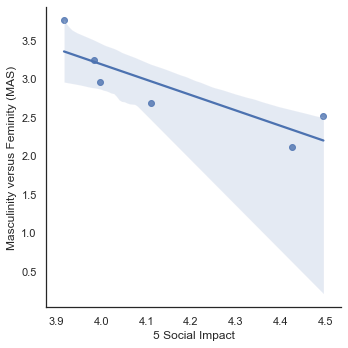

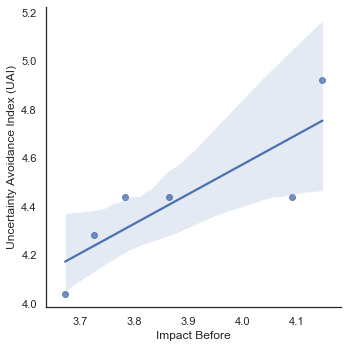

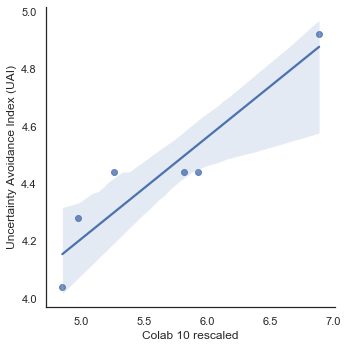

In [88]:
#columns = ['5 Social Impact', '6 Economic Impact', 'Impact Before', 'GNI per capita', 'SEDA Score', 'Colab 10 rescaled']
columns = ['5 Social Impact', '6 Economic Impact', 'Impact Before', 'Colab 10 rescaled']

for c1 in hofstede_pillars:
    print('********')
    print(c1)
    print('********')
    for c2 in columns:
        if c1!=c2 and significant_corr(all_df,all_df,c1,c2)[0]==True:
            #correl = significant_corr(i_e_unified,i_e_unified,c1,c2)
            #print(c2, np.round(correl[1],4), correl[2])
            print_significant_corr(all_df,all_df,c1,c2)
            print('')


In [89]:
columns = ['5 Social Impact', '6 Economic Impact', 'Impact Before', 'GNI per capita', 'SEDA Score', 'Colab 10 rescaled']
for c1 in hofstede_pillars:
    print('********')
    print(c1)
    print('********')
    ICD.display( significant_corr_many(all_df,all_df,c1,columns,'Column') )
    print('')
    

********
Power Distance Index (PDI)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []


********
Individualism versus Collectivism (IDV)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []


********
Masculinity versus Feminity (MAS)
********


Column  Pearson Correlation    Pvalue
0  5 Social Impact            -0.852481  0.031038


********
Uncertainty Avoidance Index (UAI)
********


Column  Pearson Correlation    Pvalue
0      Impact Before             0.834423  0.038854
1  Colab 10 rescaled             0.933582  0.006471


********
Long Term Orientation (LTO)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []


********
Indulgence versus Restraint (IVR)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []

### Correlaciones significativas par a part entre pilares de iEco y dimensiones de Hofstede

Por último en esta sección, vamos a imprimir aquellas correlaciones que son significativas. 

In [90]:
L=list(df_i_e_unified.columns)
for a in L:
    print('********')
    print(a)
    print('********')
    ICD.display( significant_corr_many(df_i_e_unified , df_i_e_unified , a , L ,'Column') )
    

********
1 Foundational Institutions
********


Column  Pearson Correlation        Pvalue
0  1 Foundational Institutions             1.000000  1.848893e-32
1            6 Economic Impact             0.904313  1.329586e-02
2                   5&6 Impact             0.886815  1.849119e-02

********
2 Innovation Capacity
********


Column  Pearson Correlation        Pvalue
0  2 Innovation Capacity             1.000000  1.848893e-32
1         GNI per capita             0.860901  2.767696e-02
2       2&3 I&E Capacity             0.885081  1.905085e-02

********
3 Entrepreneurship Capacity
********


Column  Pearson Correlation        Pvalue
0  3 Entrepreneurship Capacity             1.000000  1.664003e-31
1      4 Comparative Advantage             0.870478  2.407749e-02

********
4 Comparative Advantage
********


Column  Pearson Correlation    Pvalue
0  3 Entrepreneurship Capacity             0.870478  0.024077
1      4 Comparative Advantage             1.000000  0.000000

********
5 Social Impact
********


Column  Pearson Correlation        Pvalue
0                    5 Social Impact             1.000000  7.395571e-32
1  Masculinity versus Feminity (MAS)            -0.852481  3.103763e-02
2                         5&6 Impact             0.925869  8.039382e-03
3                      Impact Before             0.974439  9.716857e-04

********
6 Economic Impact
********


Column  Pearson Correlation    Pvalue
0  1 Foundational Institutions             0.904313  0.013296
1            6 Economic Impact             1.000000  0.000000

********
GNI per capita
********


Column  Pearson Correlation    Pvalue
0  2 Innovation Capacity             0.860901  0.027677
1         GNI per capita             1.000000  0.000000
2             SEDA Score             0.923729  0.008504

********
Individualism versus Collectivism (IDV)
********


Column  Pearson Correlation  Pvalue
0  Individualism versus Collectivism (IDV)                  1.0     0.0

********
Indulgence versus Restraint (IVR)
********


Column  Pearson Correlation        Pvalue
0  Indulgence versus Restraint (IVR)                  1.0  1.848893e-32

********
Long Term Orientation (LTO)
********


Column  Pearson Correlation  Pvalue
0  Long Term Orientation (LTO)                  1.0     0.0

********
Masculinity versus Feminity (MAS)
********


Column  Pearson Correlation        Pvalue
0                    5 Social Impact            -0.852481  3.103763e-02
1  Masculinity versus Feminity (MAS)             1.000000  1.664003e-31

********
Power Distance Index (PDI)
********


Column  Pearson Correlation  Pvalue
0  Power Distance Index (PDI)                  1.0     0.0

********
SEDA Score
********


Column  Pearson Correlation        Pvalue
0  GNI per capita             0.923729  8.504046e-03
1      SEDA Score             1.000000  1.848893e-32

********
Uncertainty Avoidance Index (UAI)
********


Column  Pearson Correlation    Pvalue
0  Uncertainty Avoidance Index (UAI)             1.000000  0.000000
1                      Impact Before             0.834423  0.038854
2                           Colab 10             0.933582  0.006471
3       Inverted Ranking Capitals 10             0.905486  0.012977

********
2&3 I&E Capacity
********


Column  Pearson Correlation    Pvalue
0  2 Innovation Capacity             0.885081  0.019051
1       2&3 I&E Capacity             1.000000  0.000000

********
5&6 Impact
********


Column  Pearson Correlation    Pvalue
0  1 Foundational Institutions             0.886815  0.018491
1              5 Social Impact             0.925869  0.008039
2                   5&6 Impact             1.000000  0.000000
3                Impact Before             0.948098  0.003971

********
Impact Before
********


Column  Pearson Correlation        Pvalue
0                    5 Social Impact             0.974439  9.716857e-04
1  Uncertainty Avoidance Index (UAI)             0.834423  3.885391e-02
2                         5&6 Impact             0.948098  3.970807e-03
3                      Impact Before             1.000000  1.848893e-32
4                           Colab 10             0.823935  4.376951e-02

********
Colab 10
********


Column  Pearson Correlation    Pvalue
0  Uncertainty Avoidance Index (UAI)             0.933582  0.006471
1                      Impact Before             0.823935  0.043770
2                           Colab 10             1.000000  0.000000
3       Inverted Ranking Capitals 10             0.958668  0.002527

********
Inverted Ranking Capitals 10
********


Column  Pearson Correlation    Pvalue
0  Uncertainty Avoidance Index (UAI)             0.905486  0.012977
1                           Colab 10             0.958668  0.002527
2       Inverted Ranking Capitals 10             1.000000  0.000000

# Separar por regiones

In [162]:
columns = ['5 Social Impact', '6 Economic Impact']
for reg in set(Score_df['Region 2']):
    print(reg)
    countries=list(Score_df[Score_df['Region 2']==reg]['Country'].values)
    for c1 in hofstede_pillars:
        print('********')
        print(c1)
        print('********')
        ICD.display( significant_corr_many(df_means.loc[countries],df_means.loc[countries],c1,columns,'Column') )
        print('')

Europa
********
Power Distance Index (PDI)
********


Column  Pearson Correlation    Pvalue
0    5 Social Impact            -0.618137  0.000059
1  6 Economic Impact            -0.381889  0.021542


********
Individualism versus Collectivism (IDV)
********


Column  Pearson Correlation    Pvalue
0    5 Social Impact             0.643361  0.000023
1  6 Economic Impact             0.409660  0.013094


********
Masculinity versus Feminity (MAS)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []


********
Uncertainty Avoidance Index (UAI)
********


Column  Pearson Correlation   Pvalue
0  5 Social Impact            -0.431603  0.00858


********
Long Term Orientation (LTO)
********


Column  Pearson Correlation    Pvalue
0  5 Social Impact            -0.365157  0.028534


********
Indulgence versus Restraint (IVR)
********


Column  Pearson Correlation    Pvalue
0    5 Social Impact             0.578635  0.000218
1  6 Economic Impact             0.340098  0.042406


Iberoamérica
********
Power Distance Index (PDI)
********


Column  Pearson Correlation    Pvalue
0    5 Social Impact            -0.552401  0.021480
1  6 Economic Impact             0.527888  0.029406


********
Individualism versus Collectivism (IDV)
********


Column  Pearson Correlation    Pvalue
0    5 Social Impact             0.545980  0.023373
1  6 Economic Impact            -0.594364  0.011864


********
Masculinity versus Feminity (MAS)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []


********
Uncertainty Avoidance Index (UAI)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []


********
Long Term Orientation (LTO)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []


********
Indulgence versus Restraint (IVR)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []


Oriente Medio
********
Power Distance Index (PDI)
********


Column  Pearson Correlation   Pvalue
0  6 Economic Impact            -0.705377  0.00227


********
Individualism versus Collectivism (IDV)
********


Column  Pearson Correlation    Pvalue
0    5 Social Impact             0.738755  0.001079
1  6 Economic Impact             0.653165  0.006079


********
Masculinity versus Feminity (MAS)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []


********
Uncertainty Avoidance Index (UAI)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []


********
Long Term Orientation (LTO)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []


********
Indulgence versus Restraint (IVR)
********


Column  Pearson Correlation    Pvalue
0  5 Social Impact             0.731405  0.001283


Extremo Oriente
********
Power Distance Index (PDI)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []


********
Individualism versus Collectivism (IDV)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []


********
Masculinity versus Feminity (MAS)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []


********
Uncertainty Avoidance Index (UAI)
********


Column  Pearson Correlation   Pvalue
0  6 Economic Impact            -0.754174  0.01173


********
Long Term Orientation (LTO)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []


********
Indulgence versus Restraint (IVR)
********


Column  Pearson Correlation    Pvalue
0  5 Social Impact             0.689494  0.027389


Other
********
Power Distance Index (PDI)
********


Column  Pearson Correlation    Pvalue
0  5 Social Impact            -0.624504  0.000498


********
Individualism versus Collectivism (IDV)
********


Column  Pearson Correlation    Pvalue
0  5 Social Impact             0.770171  0.000003


********
Masculinity versus Feminity (MAS)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []


********
Uncertainty Avoidance Index (UAI)
********


Column  Pearson Correlation    Pvalue
0    5 Social Impact            -0.589078  0.001225
1  6 Economic Impact            -0.489625  0.009536


********
Long Term Orientation (LTO)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []


********
Indulgence versus Restraint (IVR)
********


Empty DataFrame
Columns: [Column, Pearson Correlation, Pvalue]
Index: []

***********************************************
Graph metrics, iEco, and Hofstede Correlations
***********************************************
**********************
Europa
**********************


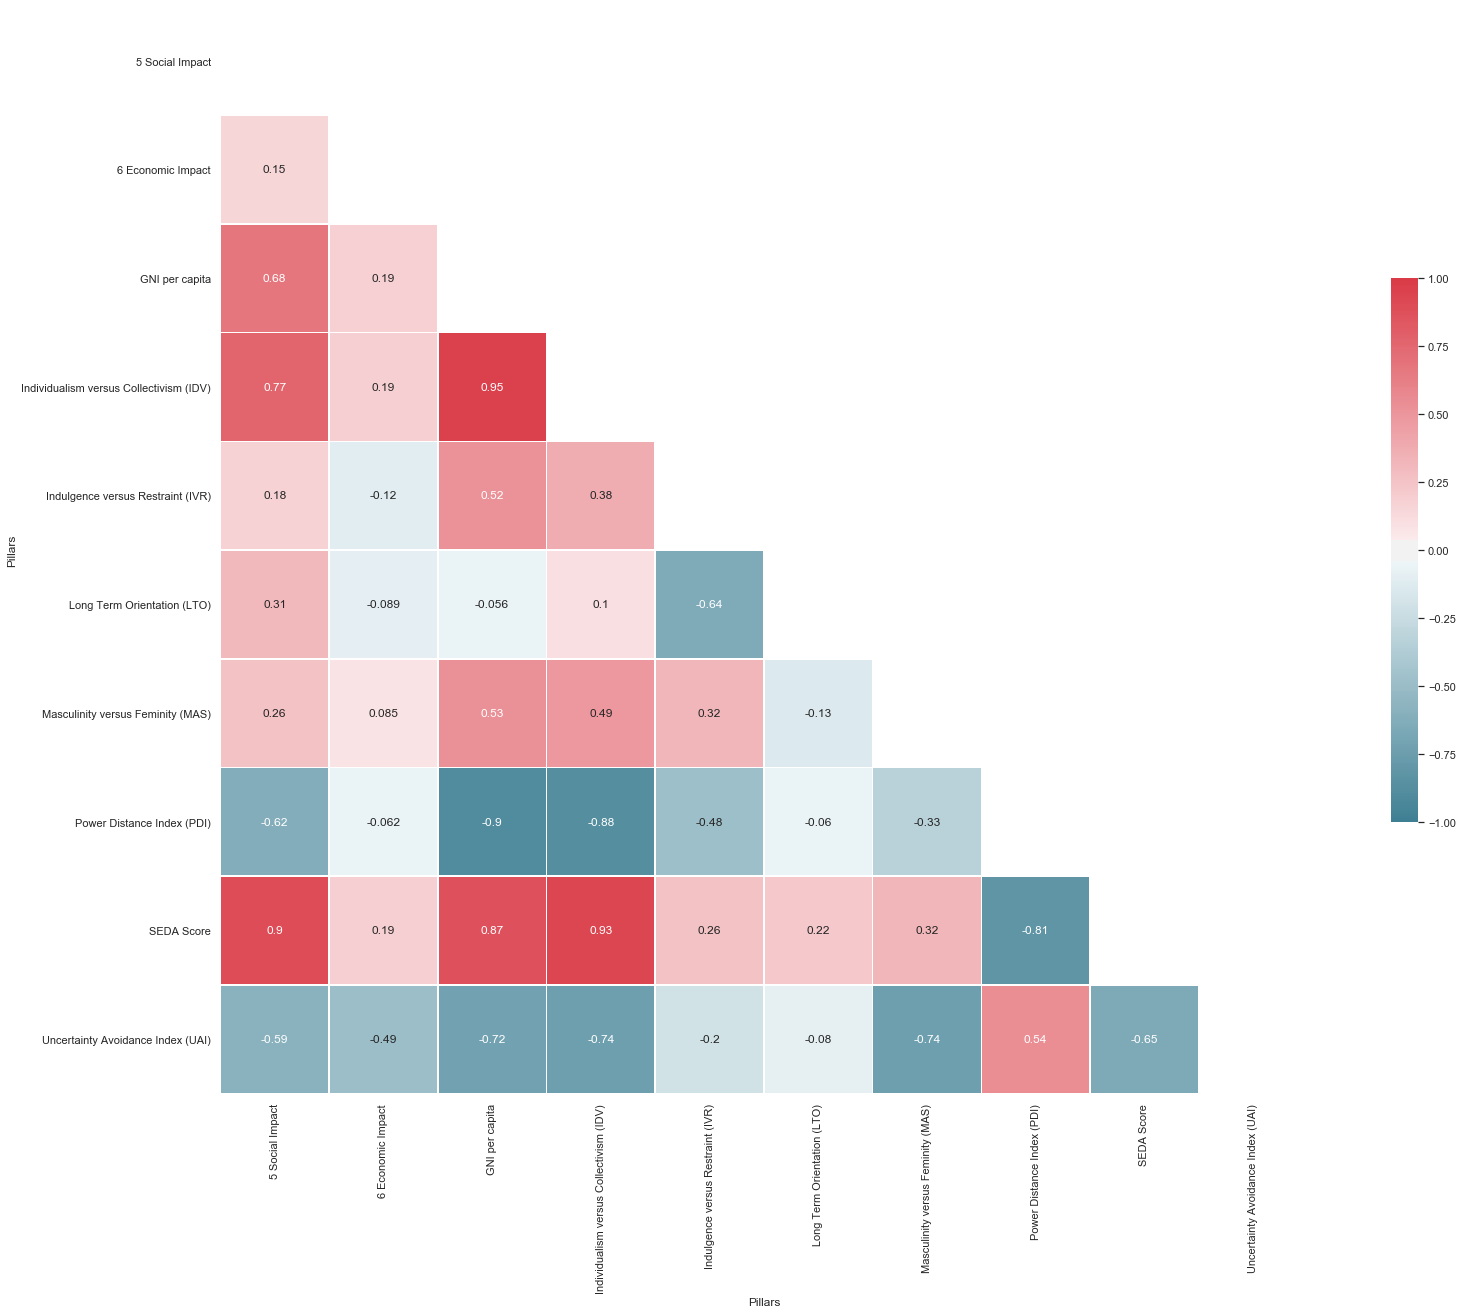

**********************
Iberoamérica
**********************


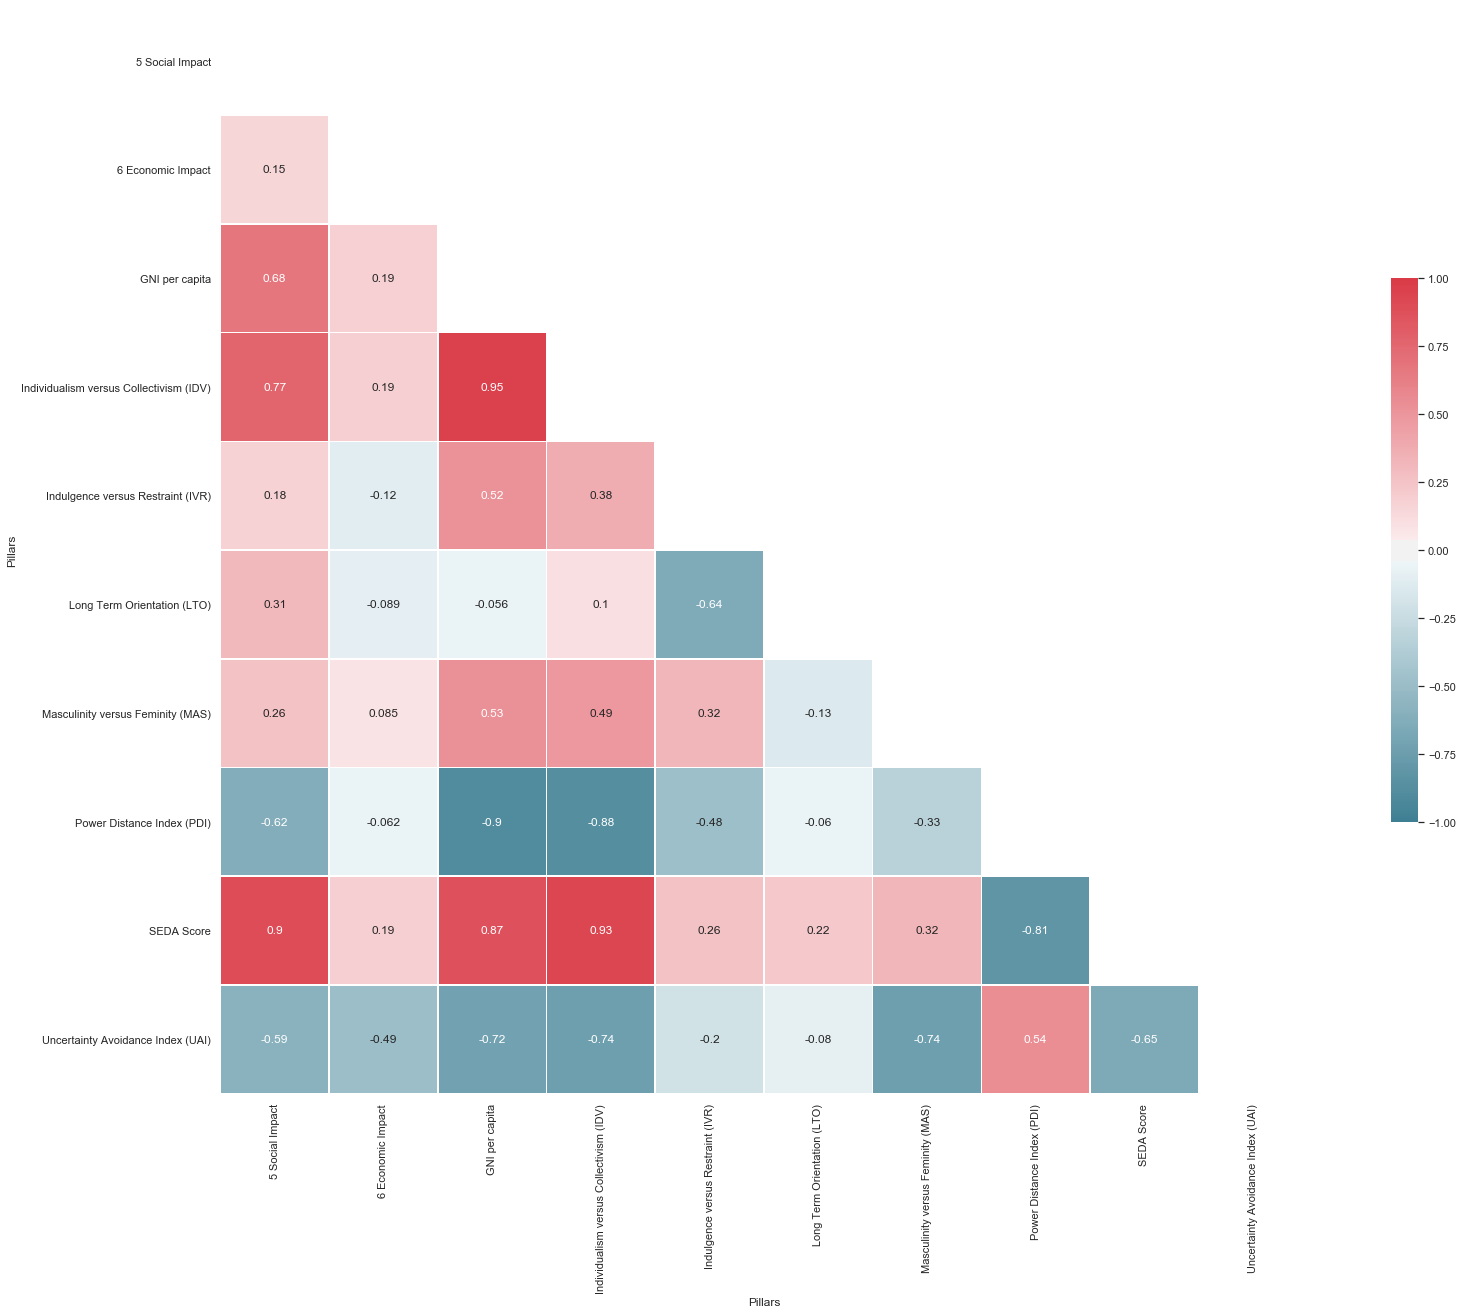

**********************
Oriente Medio
**********************


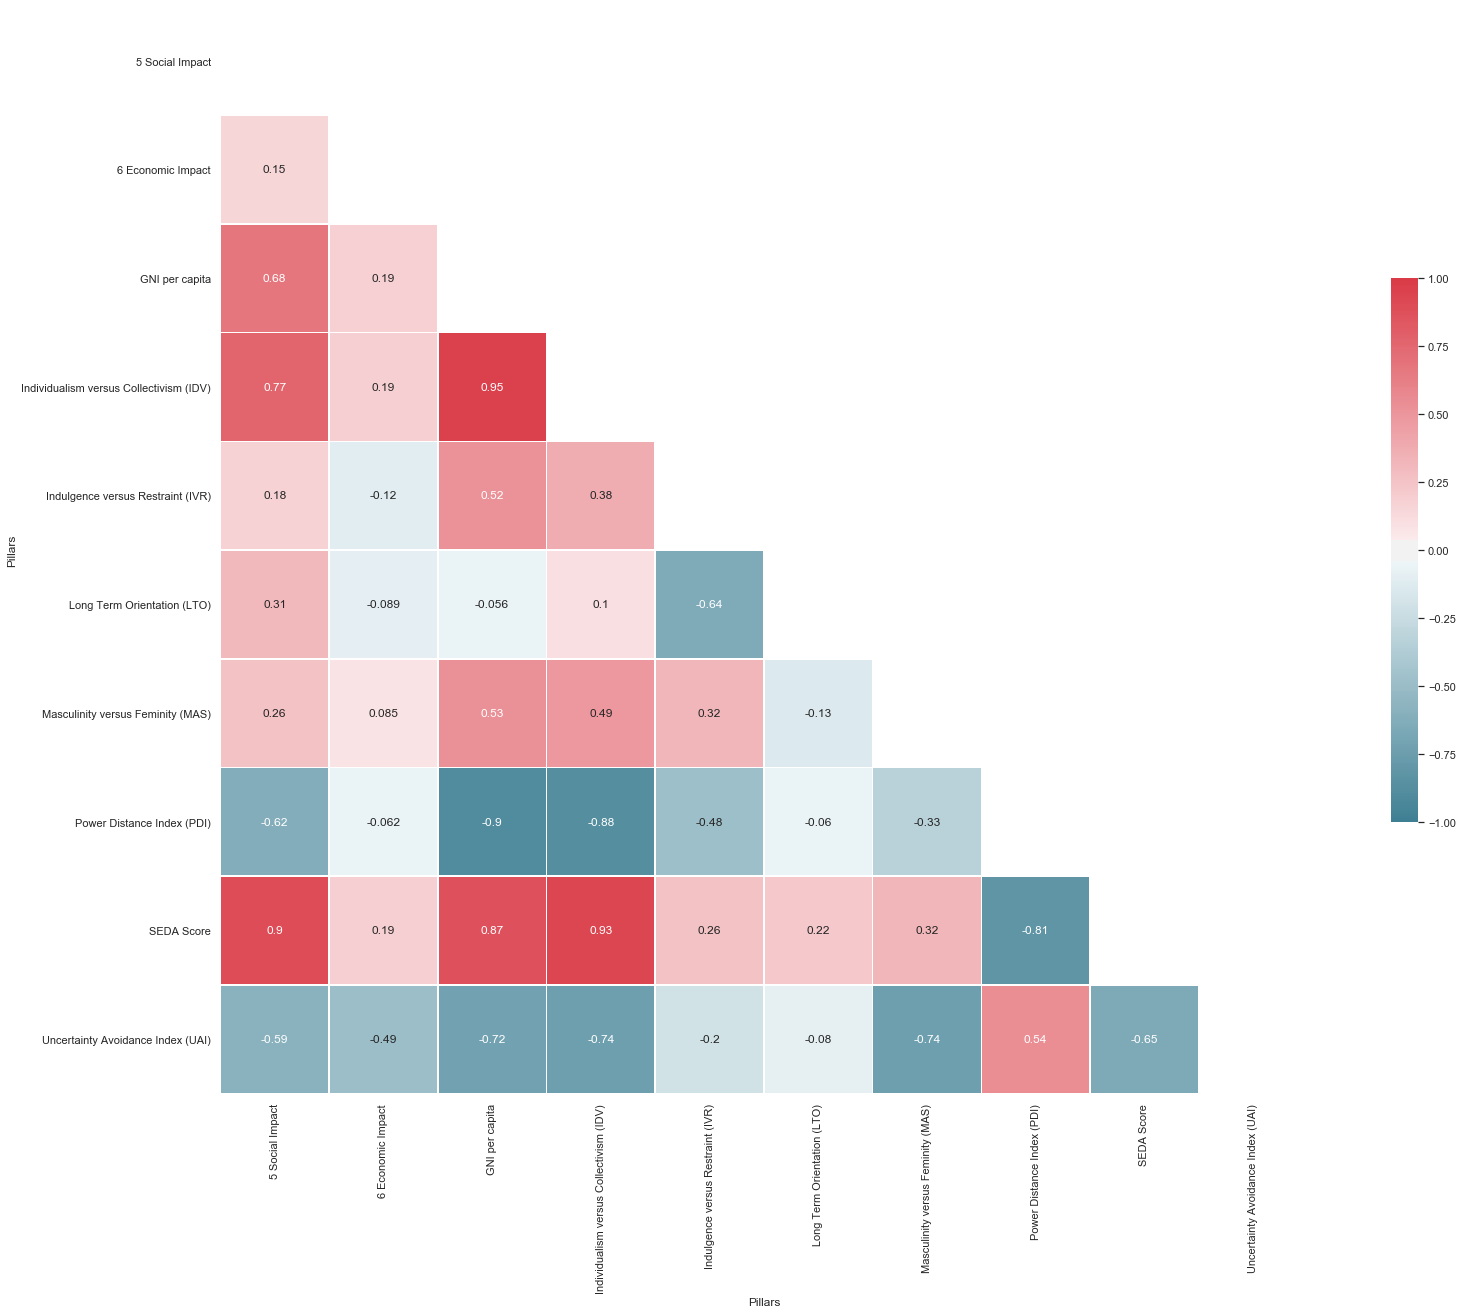

**********************
Extremo Oriente
**********************


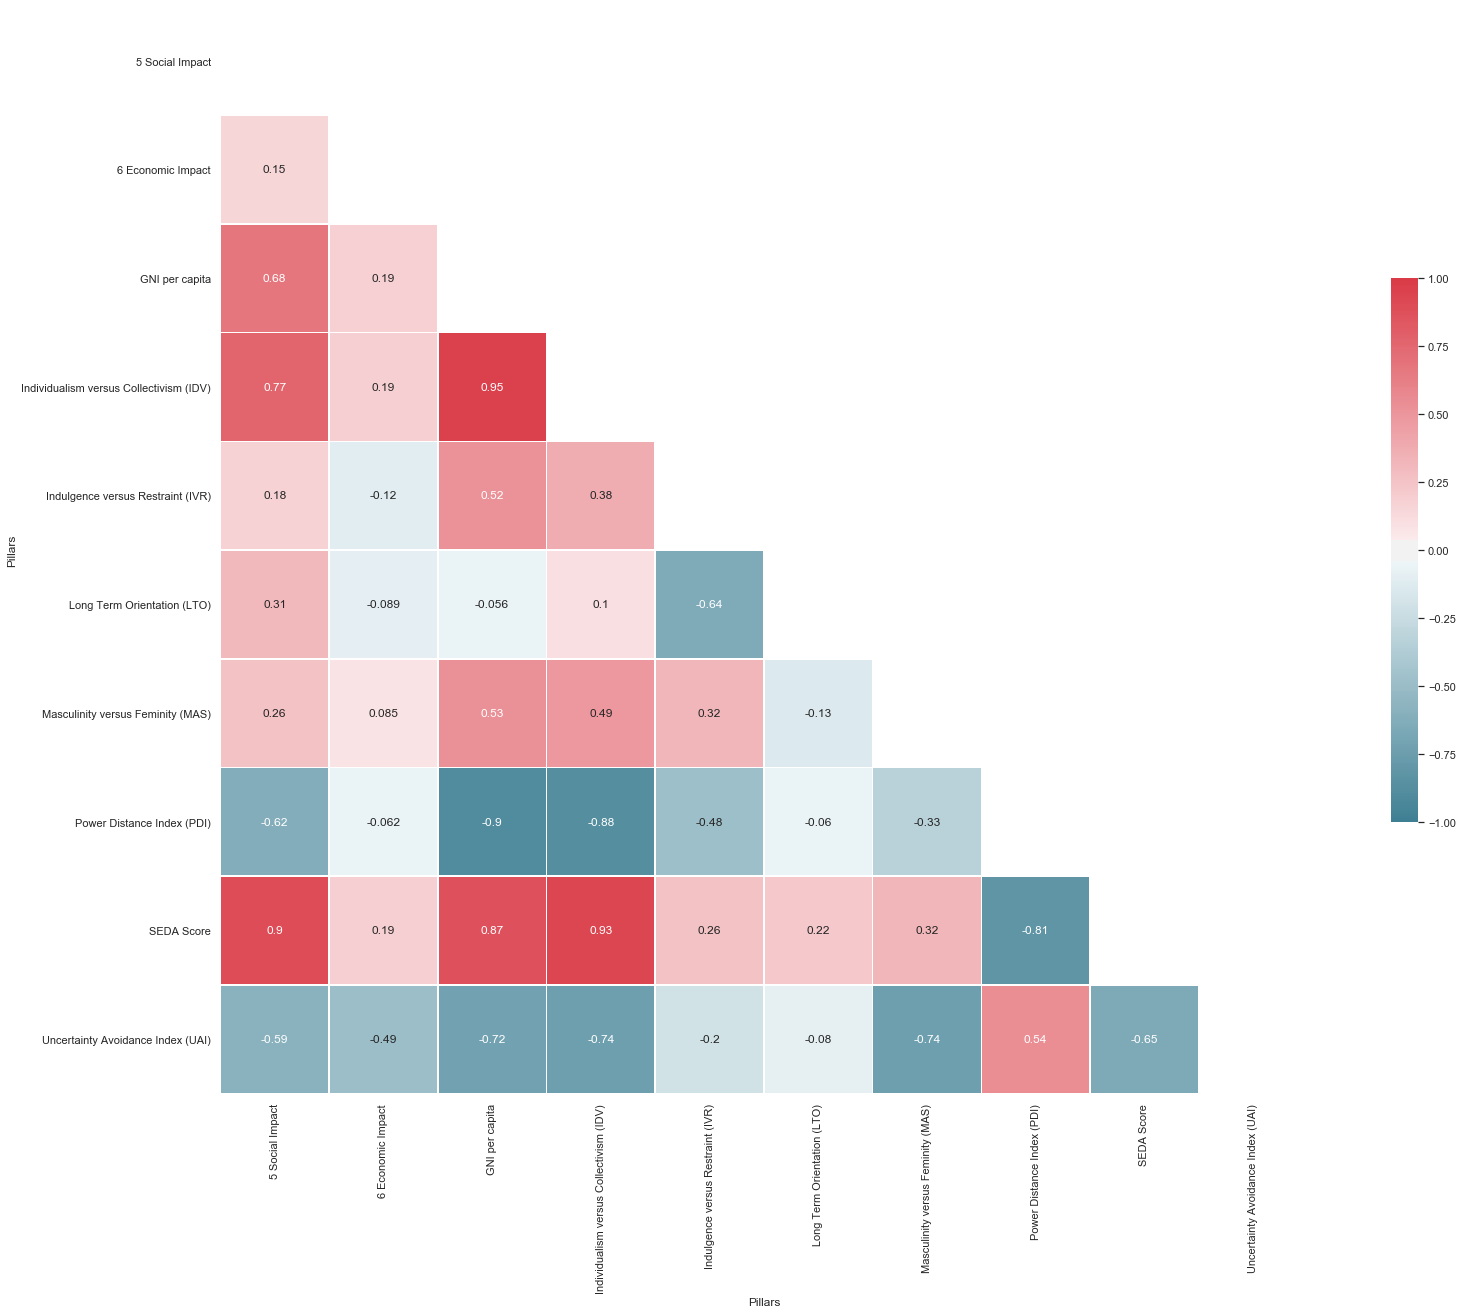

**********************
Other
**********************


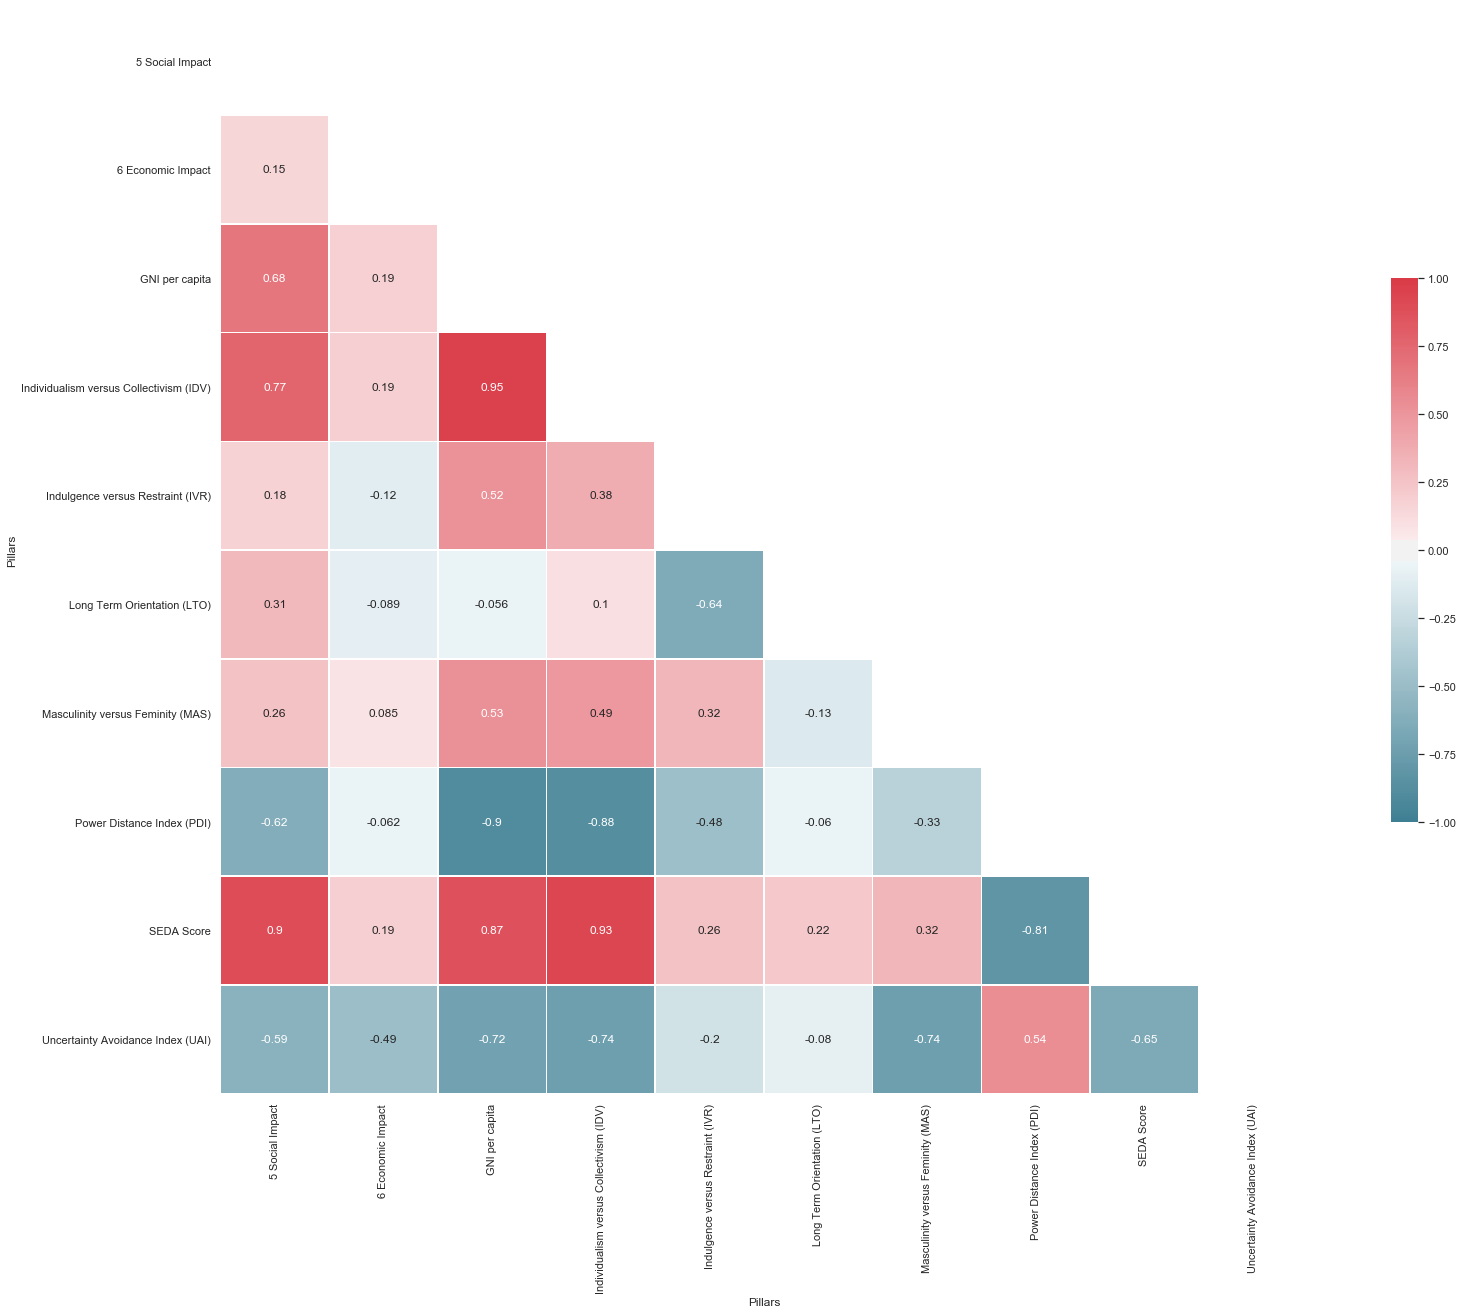

In [169]:
print('***********************************************')
print('Graph metrics, iEco, and Hofstede Correlations')
print('***********************************************')

pilares=list(df_means.keys())[12:]

for reg in set(Score_df['Region 2']):
    print('**********************')
    print(reg)
    print('**********************')
    corr = df_means.loc[countries][pilares].corr()

    import seaborn as sns
    sns.set(style="white")

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(30, 20))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})
    plt.show()

## Part 8: Spider Comparisons

Ahora vamos a hacer visualizaciones tales como mapas de araña para comparar los datos que conocemos de dos capitales. 

In [91]:
#@title Función de spider plot
def make_spider_comparison(df ,country_name1, country_name2):
    from math import pi
    categories=list(df)
    N = len(categories)
  
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    fig = plt.figure(figsize=(8, 8))
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
  
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories )
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5], ["1","2","3","4",""], color="grey", size=13)
    plt.ylim(0,5)
  
  
    # ------- PART 2: Add plots
  
    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable
  
    # Ind1
    values=df.loc[country_name1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country_name1)
    ax.fill(angles, values, 'b', alpha=0.1)
  
    # Ind2
    values=df.loc[country_name2].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country_name2)
    ax.fill(angles, values, 'r', alpha=0.1)
  
    # Add legend
    plt.legend( bbox_to_anchor=(0.05, 0.25))
    plt.tight_layout()

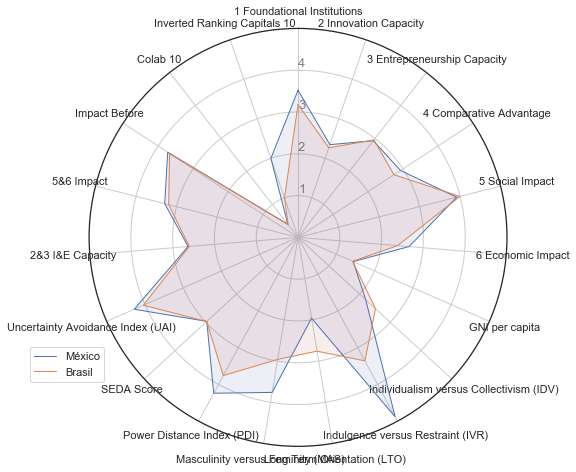

In [92]:
#make_spider_comparison(df_means,'Mexico','Uruguay')
make_spider_comparison(df_i_e_unified,'México','Brasil')

In [93]:
only_iecos = df_means.drop(['GNI per capita','SEDA Score'], axis = 1)
#only_iecos

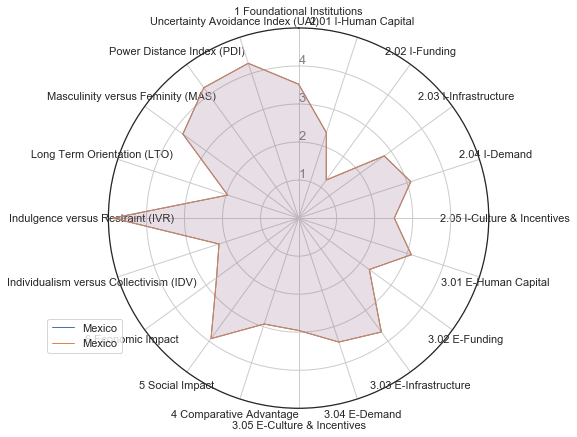

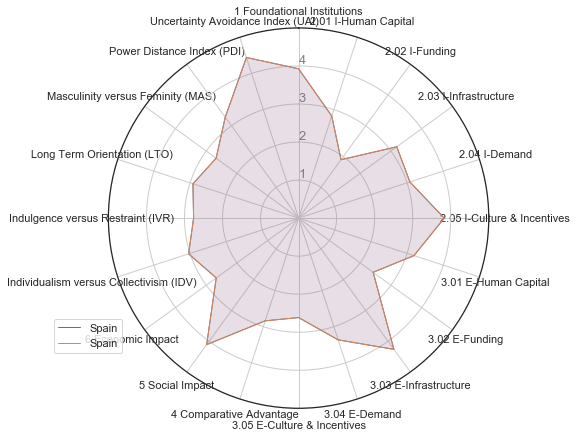

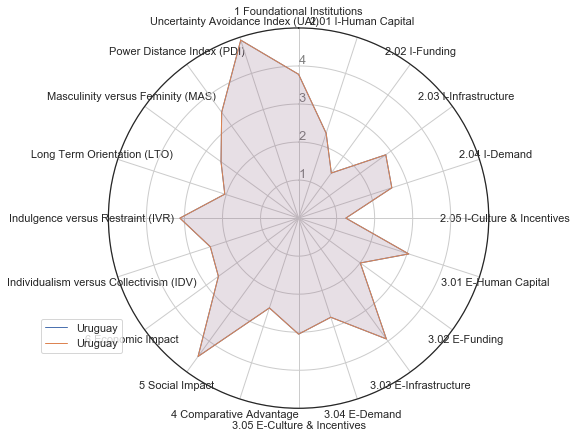

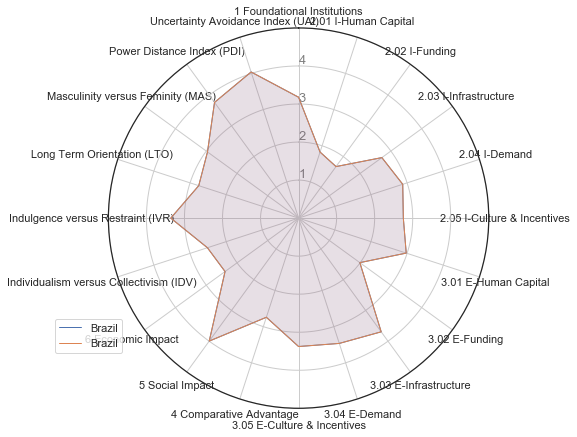

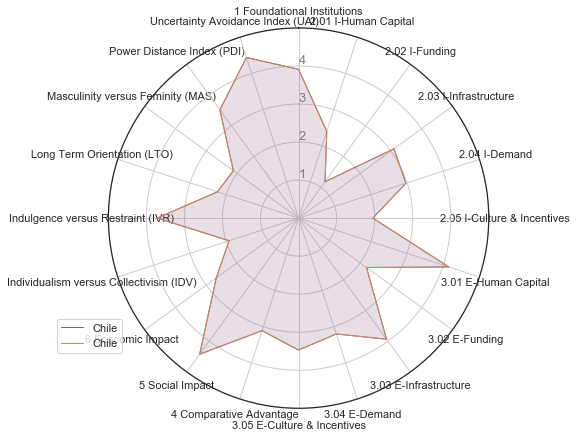

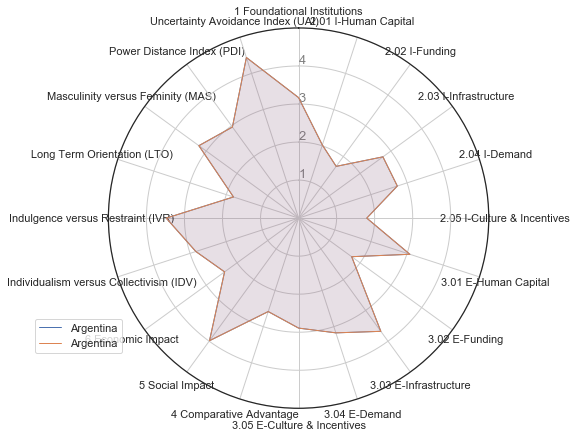

In [94]:
#-------------------------------------------
# Spider Web visualization of each country
#-------------------------------------------

paises=['México', 'España', 'Uruguay', 'Brasil', 'Chile', 'Argentina']
countries=['Mexico', 'Spain', 'Uruguay', 'Brazil', 'Chile', 'Argentina']


for country1 in countries:
    for country2 in countries:
        if country1==country2:
            make_spider_comparison(only_iecos,country1,country2)
            

## Parte 9: Principal Component Analysis

This part utilizes Principal Component Analysis in order to visualize the set of studied countries, separated by: 
*  Cultural Group
*  Development stage of its economy
*  Continent

In [95]:
%pip install plotly==4.9.0
import plotly.express as px

Note: you may need to restart the kernel to use updated packages.


##### First: Using Data only from iEcosystems pilars

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(only_iecos)
print(f"La varianza explicada es: {np.sum(pca.explained_variance_ratio_)} %")


print('')
print('PCA explained variance ratio')
print(pca.explained_variance_ratio_)

La varianza explicada es: 0.6438309886404782 %

PCA explained variance ratio
[0.40777726 0.14377097 0.09228276]


In [97]:
Components_df = pd.DataFrame({
    "Component_1": pca.components_[0],
    "Component_2": pca.components_[1],
    "Component_3": pca.components_[2],
    "Pilar" : only_iecos.columns})
Components_df.set_index('Pilar',inplace=True)

Components_df

Component_1  Component_2  Component_3
Pilar                                                                         
1 Foundational Institutions                 0.222799     0.003666    -0.128837
2.01 I-Human Capital                        0.246716     0.012619    -0.010214
2.02 I-Funding                              0.268126     0.127543     0.168100
2.03 I-Infrastructure                       0.253892    -0.029135    -0.120600
2.04 I-Demand                               0.191597    -0.018500     0.170829
2.05 I-Culture & Incentives                 0.275966     0.252698     0.507721
3.01 E-Human Capital                       -0.029480    -0.064913     0.025617
3.02 E-Funding                              0.245064    -0.122160     0.080909
3.03 E-Infrastructure                       0.241301     0.044787    -0.086108
3.04 E-Demand                               0.188147     0.014402     0.328570
3.05 E-Culture & Incentives                -0.039766    -0.096200     0.088252
4 Comparative Advantage                     0.212529    -0.159249     0.181209
5 Social Impact                             0.195262    -0.018866    -0.199386
6 Economic Impact                           0.075174    -0.002752    -0.031819
Individualism versus Collectivism (IDV)     0.441176    -0.085435    -0.266119
Indulgence versus Restraint (IVR)           0.112515    -0.599590     0.137706
Long Term Orientation (LTO)                 0.211117     0.660310    -0.206638
Masculinity versus Feminity (MAS)           0.020275     0.088920     0.389396
Power Distance Index (PDI)                 -0.317413     0.208363     0.355460
Uncertainty Avoidance Index (UAI)          -0.205343     0.089695    -0.197741

In [98]:
#aquí podemos observar en el primer componente, cuáles métricas contribuyen más/menos
Components_df['Component_1'].sort_values(ascending=False)

Pilar
Individualism versus Collectivism (IDV)    0.441176
2.05 I-Culture & Incentives                0.275966
2.02 I-Funding                             0.268126
2.03 I-Infrastructure                      0.253892
2.01 I-Human Capital                       0.246716
3.02 E-Funding                             0.245064
3.03 E-Infrastructure                      0.241301
1 Foundational Institutions                0.222799
4 Comparative Advantage                    0.212529
Long Term Orientation (LTO)                0.211117
5 Social Impact                            0.195262
2.04 I-Demand                              0.191597
3.04 E-Demand                              0.188147
Indulgence versus Restraint (IVR)          0.112515
6 Economic Impact                          0.075174
Masculinity versus Feminity (MAS)          0.020275
3.01 E-Human Capital                      -0.029480
3.05 E-Culture & Incentives               -0.039766
Uncertainty Avoidance Index (UAI)         -0.205343
Power 

In [99]:
#mismo para el segundo componente
Components_df['Component_2'].sort_values(ascending=False)

Pilar
Long Term Orientation (LTO)                0.660310
2.05 I-Culture & Incentives                0.252698
Power Distance Index (PDI)                 0.208363
2.02 I-Funding                             0.127543
Uncertainty Avoidance Index (UAI)          0.089695
Masculinity versus Feminity (MAS)          0.088920
3.03 E-Infrastructure                      0.044787
3.04 E-Demand                              0.014402
2.01 I-Human Capital                       0.012619
1 Foundational Institutions                0.003666
6 Economic Impact                         -0.002752
2.04 I-Demand                             -0.018500
5 Social Impact                           -0.018866
2.03 I-Infrastructure                     -0.029135
3.01 E-Human Capital                      -0.064913
Individualism versus Collectivism (IDV)   -0.085435
3.05 E-Culture & Incentives               -0.096200
3.02 E-Funding                            -0.122160
4 Comparative Advantage                   -0.159249
Indulg

In [100]:
#mismo, para el tercer componente
Components_df['Component_3'].sort_values(ascending=False)

Pilar
2.05 I-Culture & Incentives                0.507721
Masculinity versus Feminity (MAS)          0.389396
Power Distance Index (PDI)                 0.355460
3.04 E-Demand                              0.328570
4 Comparative Advantage                    0.181209
2.04 I-Demand                              0.170829
2.02 I-Funding                             0.168100
Indulgence versus Restraint (IVR)          0.137706
3.05 E-Culture & Incentives                0.088252
3.02 E-Funding                             0.080909
3.01 E-Human Capital                       0.025617
2.01 I-Human Capital                      -0.010214
6 Economic Impact                         -0.031819
3.03 E-Infrastructure                     -0.086108
2.03 I-Infrastructure                     -0.120600
1 Foundational Institutions               -0.128837
Uncertainty Avoidance Index (UAI)         -0.197741
5 Social Impact                           -0.199386
Long Term Orientation (LTO)               -0.206638
Indivi

In [101]:
import math
def replace_nan(arr):
    arr2 = arr.copy()
    for i in range(len(arr2)):
        if type(arr2[i])!=str and math.isnan(arr2[i])==True:
            arr2[i] = 'Other'
    return arr2

Scores = pca.transform(only_iecos)
Score_df = pd.DataFrame({
    "Component_1": Scores[:,0],
    "Component_2": Scores[:,1],
    "Component_3": Scores[:,2],
    "Country" :df.index,
    "Region" :df['Region'],
    "Development Stage" : df['Development Stage'],
    "Region":df['Region'], 
    "Region 2":replace_nan(df['Region 2'])
})


Score_df

Component_1  Component_2  Component_3         Country  \
Country                                                                 
Albania           -1.405608     1.228327    -0.821173         Albania   
Algeria           -1.053116     0.077180     0.436950         Algeria   
Argentina         -0.523066    -1.059895    -0.194208       Argentina   
Armenia           -0.678347     0.753711    -0.678922         Armenia   
Australia          2.584042    -1.586007     0.217347       Australia   
...                     ...          ...          ...             ...   
United Kingdom     4.004271    -0.721121     1.073213  United Kingdom   
United States      4.876697    -1.687500     1.902608   United States   
Uruguay           -0.818491    -0.769658    -1.080138         Uruguay   
Vietnam           -0.354404     0.479731     0.330981         Vietnam   
Zambia            -2.233171    -0.289563     0.097595          Zambia   

                                         Region          Development Stage  \
Country                                                                      
Albania                 Europe and Central Asia    Economies in transition   
Algeria            Middle East and North Africa       Developing economies   
Argentina       Latin America and the Caribbean       Developing economies   
Armenia                 Europe and Central Asia    Economies in transition   
Australia                 East Asia and Pacific        Developed economies   
...                                         ...                        ...   
United Kingdom          Europe and Central Asia        Developed economies   
United States                     North America        Developed economies   
Uruguay         Latin America and the Caribbean       Developing economies   
Vietnam                   East Asia and Pacific       Developing economies   
Zambia                       Sub-Saharan Africa  Least developed countries   

                       Region 2  
Country                          
Albania                  Europa  
Algeria           Oriente Medio  
Argentina          Iberoamérica  
Armenia                   Other  
Australia                 Other  
...                         ...  
United Kingdom           Europa  
United States             Other  
Uruguay            Iberoamérica  
Vietnam         Extremo Oriente  
Zambia                    Other  

[106 rows x 7 columns]

In [102]:
#de acuerdo a Devpt stage
#fig = px.scatter_3d(Score_df, x='Component_1', y='Component_2', z='Component_3', color='Development Stage', text='Country')

#de acuerdo a Region
#fig = px.scatter_3d(Score_df, x='Component_1', y='Component_2', z='Component_3', color='Region', text='Country')

#de acuerdo a 'Region 2'
new_Score_df = Score_df[Score_df['Region 2'] != 'Other']    #exclude
#new_Score_df
fig = px.scatter_3d(new_Score_df, title='Representación en 3D de los 106 países - pilares de iEcosystem y dimensiones de Hofstede', x='Component_1', y='Component_2', z='Component_3', color='Region 2', text='Country')
fig.show()


##### Second: Using Data only from Hofstede dimensions

In [103]:
only_hofstedes = df_imputed [ hofstede_pillars ]
#only_hofstedes

In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(only_hofstedes)
print(f"La varianza explicada es: {np.sum(pca.explained_variance_ratio_)} %")


print('')
print('PCA explained variance ratio')
print(pca.explained_variance_ratio_)

La varianza explicada es: 0.7727656386856457 %

PCA explained variance ratio
[0.38745739 0.26476382 0.12054443]


In [105]:
Components_df = pd.DataFrame({
    "Component_1": pca.components_[0],
    "Component_2": pca.components_[1],
    "Component_3": pca.components_[2],
    "Pilar" : only_hofstedes.columns})
Components_df.set_index('Pilar',inplace=True)

Components_df

Component_1  Component_2  Component_3
Pilar                                                                         
Power Distance Index (PDI)                 -0.545645     0.133663     0.265759
Individualism versus Collectivism (IDV)     0.710932     0.001802    -0.148840
Masculinity versus Feminity (MAS)          -0.000409     0.040228     0.177479
Uncertainty Avoidance Index (UAI)          -0.316613     0.011330    -0.925875
Long Term Orientation (LTO)                 0.252262     0.757373    -0.109705
Indulgence versus Restraint (IVR)           0.181568    -0.637786    -0.080253

In [106]:
#aquí podemos observar en el primer componente, cuáles métricas contribuyen más/menos
Components_df['Component_1'].sort_values(ascending=False)

Pilar
Individualism versus Collectivism (IDV)    0.710932
Long Term Orientation (LTO)                0.252262
Indulgence versus Restraint (IVR)          0.181568
Masculinity versus Feminity (MAS)         -0.000409
Uncertainty Avoidance Index (UAI)         -0.316613
Power Distance Index (PDI)                -0.545645
Name: Component_1, dtype: float64

In [107]:
#mismo para el segundo componente
Components_df['Component_2'].sort_values(ascending=False)

Pilar
Long Term Orientation (LTO)                0.757373
Power Distance Index (PDI)                 0.133663
Masculinity versus Feminity (MAS)          0.040228
Uncertainty Avoidance Index (UAI)          0.011330
Individualism versus Collectivism (IDV)    0.001802
Indulgence versus Restraint (IVR)         -0.637786
Name: Component_2, dtype: float64

In [108]:
#mismo, para el tercer componente
Components_df['Component_3'].sort_values(ascending=False)

Pilar
Power Distance Index (PDI)                 0.265759
Masculinity versus Feminity (MAS)          0.177479
Indulgence versus Restraint (IVR)         -0.080253
Long Term Orientation (LTO)               -0.109705
Individualism versus Collectivism (IDV)   -0.148840
Uncertainty Avoidance Index (UAI)         -0.925875
Name: Component_3, dtype: float64

In [109]:
Scores = pca.transform(only_hofstedes)
Score_df = pd.DataFrame({
    "Component_1": Scores[:,0],
    "Component_2": Scores[:,1],
    "Component_3": Scores[:,2],
    "Country" :df.index,
    "Region" :df['Region'],
    "Development Stage" : df['Development Stage'],
    "Region":df['Region'], 
    "Region 2":replace_nan(df['Region 2'])
})


Score_df

Component_1  Component_2  Component_3         Country  \
Country                                                                 
Albania           -0.910033     1.288219    -0.212563         Albania   
Algeria           -0.506739    -0.220941     0.098667         Algeria   
Argentina          0.229159    -1.233018    -0.649544       Argentina   
Armenia           -0.121967     1.041507     0.053183         Armenia   
Australia          2.239114    -1.495781     0.270004       Australia   
...                     ...          ...          ...             ...   
United Kingdom     2.766894    -0.551228     0.746897  United Kingdom   
United States      2.315870    -1.257664     0.465275   United States   
Uruguay           -0.473625    -0.781734    -1.032087         Uruguay   
Vietnam           -0.081824     0.635981     1.613169         Vietnam   
Zambia            -1.222642    -0.318133    -0.154582          Zambia   

                                         Region          Development Stage  \
Country                                                                      
Albania                 Europe and Central Asia    Economies in transition   
Algeria            Middle East and North Africa       Developing economies   
Argentina       Latin America and the Caribbean       Developing economies   
Armenia                 Europe and Central Asia    Economies in transition   
Australia                 East Asia and Pacific        Developed economies   
...                                         ...                        ...   
United Kingdom          Europe and Central Asia        Developed economies   
United States                     North America        Developed economies   
Uruguay         Latin America and the Caribbean       Developing economies   
Vietnam                   East Asia and Pacific       Developing economies   
Zambia                       Sub-Saharan Africa  Least developed countries   

                       Region 2  
Country                          
Albania                  Europa  
Algeria           Oriente Medio  
Argentina          Iberoamérica  
Armenia                   Other  
Australia                 Other  
...                         ...  
United Kingdom           Europa  
United States             Other  
Uruguay            Iberoamérica  
Vietnam         Extremo Oriente  
Zambia                    Other  

[106 rows x 7 columns]

In [123]:
#de acuerdo a 'Development Stage'
#fig = px.scatter_3d(Score_df, x='Component_1', y='Component_2', z='Component_3', color='Development Stage', text='Country')

#de acuerdo a 'Region'
#fig = px.scatter_3d(Score_df, x='Component_1', y='Component_2', z='Component_3', color='Region', text='Country')

#de acuerdo a 'Region 2'
new_Score_df = Score_df[Score_df['Region 2'] != 'Other']    #exclude
#new_Score_df
fig = px.scatter_3d(new_Score_df, x='Component_1', y='Component_2', z='Component_3', color='Region 2', text='Country')
fig.show()

## Buscando parejas de métricas correlacionadas significativamente

In [127]:
iecosystems_m=['1 Foundational Institutions', '2.01 I-Human Capital', '2.02 I-Funding', '2.03 I-Infrastructure', '2.04 I-Demand',
      '2.05 I-Culture & Incentives', '3.01 E-Human Capital', '3.02 E-Funding', '3.03 E-Infrastructure', '3.04 E-Demand', 
      '3.05 E-Culture & Incentives', '4 Comparative Advantage', '5 Impact']

global_m=['avg strength', 'Degree', 'Excentricidad', 'Clustering',
          'Diámetro', 'Radio', 'Transitividad', 'Eficiencia Global', 
          'Small Worldness', 'Core Ratio', 'Central Point Dominance', 'Spectral radius']

significant_pairs=[]
for a in iecosystems_m:
    for b in global_m:
        if significant_corr(all_df, all_df, a, b)[0]:
            significant_pairs.append((a,b))

significant_pairs


KeyError: '2.01 I-Human Capital'

In [112]:
df_graph_ieco_with_detail = pd.concat([df_imputed,Graph_df], axis = 1)
df_graph_ieco_with_detail

NameError: name 'Graph_df' is not defined

In [113]:
i_funding_components = ['2.02a R&D expenditure as a % GDP (UNESCO)',
                       '2.02b R&D expenditure in \'000 current PPP$ (UNESCO)',
                       '2.02c Public R&D Expenditure as % of total R&D expenditure (UNESCO)',
                       '2.02d Business Expenditure as % of total R&D expenditure (UNESCO)']

e_funding_components = ['3.02a VC investment',
                       '3.02b Financing of SME\'s (GCI 4.0)',
                       '3.02c Venture Capital Availability (GCI 4.0)',
                       '3.02d Ease of Credit (GII)',
                       '3.02e VC deals (GII)',
                       '3.02f Venture Capital Deal Volume']

comparative_advantage_components = ['4.01 State of cluster development (GCI 4.0)',
                                   '4.02 Country capacity to attract and retain talent']

impact_components = ['5.01 GDP per capita',
                    '5.02 Social Progress Index',
                    '5.03 Inclusive Development Index',
                    '5.04 Population below international poverty line (SDG 1 - No poverty)',
                    '5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger)',
                    '5.06 Annual growth rate of real GDP per capita (SDG 8 - Decent Jobs and Economic Growth)',
                    '5.07 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth)',
                    '5.08 Carbon dioxide emissions per unit of GDP (SDG 9 - Industry, Innovation and Infrastructure)',
                    '5.09 Proportion of urban population living in slums (SDG 11 - Sustainable Cities and Communities)',
                    '5.10 Annual population-weighted average mean concentration of fine suspended particles of less than 2.5 microns in diameter (SDG 11 - Sustainable Cities and Communities)',
                    '5.11 Domestic material consumption per capita (SDG 12 - Responsible Consumption and Production)']

collab_metrics = Graph_df.columns.values.tolist()
collab_metrics = collab_metrics[-16:]


NameError: name 'Graph_df' is not defined

In [114]:
# ---
# correlations between I Funding and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in i_funding_components:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    

NameError: name 'check_corr_significance' is not defined

In [115]:
# ---
# correlations between E Funding and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in e_funding_components:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))


for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

NameError: name 'check_corr_significance' is not defined

In [116]:
# ---
# correlations between I Funding and Impact
# ---


significant_positives = []
significant_negatives = []

for a in i_funding_components:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

NameError: name 'check_corr_significance' is not defined

In [117]:
# ---
# correlations between E Funding and Impact
# ---


significant_positives = []
significant_negatives = []

for a in e_funding_components:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

NameError: name 'check_corr_significance' is not defined

In [118]:
# ---
# correlations between Colaboration and Impact
# ---


significant_positives = []
significant_negatives = []

for a in collab_metrics:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

NameError: name 'collab_metrics' is not defined

In [119]:
# ---
# correlations between Colaboration and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in collab_metrics:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

NameError: name 'collab_metrics' is not defined

In [120]:
Graph_df

NameError: name 'Graph_df' is not defined

In [121]:
#-------------------------------------------
# Scaling 1-5 parameters per country
#-------------------------------------------


negative_type_metrics = ['Eccentricidad', 'Diámetro', 'Radio', 
                         'Camino más corto promedio', 'Central Point Dominance', 'Spectral radius']

Graph_df_copy=Graph_df.copy()

mins = {metric: min(Graph_df[metric].to_list()) for metric in list(Graph_df)}
maxs = {metric: max(Graph_df[metric].to_list()) for metric in list(Graph_df)}


# Proceso de re-escalamiento de 0 a 1
for col in Graph_df_copy.columns:
    Graph_df_copy[col] = Graph_df_copy[col].apply(lambda x: (x-mins[col])/(maxs[col]-mins[col]))

# Rescalamiento de 1 a 5    
Graph_df_copy = np.round((Graph_df_copy*4)+1,2)

# Invertimos la escala de aquellas métricas de tipo negativo
for col in negative_type_metrics:
    Graph_df_copy[col] = Graph_df_copy[col].apply(lambda x: abs(5-x)+1)

Graph_df_copy


NameError: name 'Graph_df' is not defined